# Telecom Churn Case Study

### Problem Statement

### Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Understanding the business objective and the data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### Steps Undertaken

- Reading data
- Data Cleaning
- Filter High Value Customers
- Derive Churn the target column
- Dropping Ninth month Columns
- Data Preparations
  - Creating Derived Variables
  - EDA
  - Outlier Treatment
  - Performing Train Test Split
  - Perform Scaling
- Modelling
- Observations and Recommendations

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import r2_score
from sklearn.utils import resample
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Supressing the warnings generated
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the Telecom Data
telecom_data = pd.read_csv('telecom_churn_data.csv')

In [3]:
# Displaying the top 5 rows in the dataset
telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
# Checking the dimensions of the dataset
telecom_data.shape

(99999, 226)

In [5]:
# Checking the data types of the columns
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

We observe that date columns are having object format we need to convert these to datetime format

In [6]:
# selecting all the columns with datetime format
#date_col= telecom_data.select_dtypes(include=['object'])
l=[]
for i in telecom_data.columns:
    if 'date_of' in i:
        l.append(i)

print("\nColumns represented as object\n",l)

# Converting the date columns to datetime format

for i in l:
    telecom_data[i] = pd.to_datetime(telecom_data[i])


Columns represented as object
 ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


In [7]:
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   mobile_number             int64         
 1   circle_id                 int64         
 2   loc_og_t2o_mou            float64       
 3   std_og_t2o_mou            float64       
 4   loc_ic_t2o_mou            float64       
 5   last_date_of_month_6      datetime64[ns]
 6   last_date_of_month_7      datetime64[ns]
 7   last_date_of_month_8      datetime64[ns]
 8   last_date_of_month_9      datetime64[ns]
 9   arpu_6                    float64       
 10  arpu_7                    float64       
 11  arpu_8                    float64       
 12  arpu_9                    float64       
 13  onnet_mou_6               float64       
 14  onnet_mou_7               float64       
 15  onnet_mou_8               float64       
 16  onnet_mou_9               float64       
 17  offnet_mou_

In [8]:
#Checking statistical inforation for numeric columns
telecom_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

### Handling Missing Values

In the data set we need to identify the columns which have an actual missing and which have a meaningful missing 
A meaniningful missing value is a one which has got all the values missing in the relevant columns for a particular record.

In [9]:
# Checking missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

We see that there many columns which have more than 70% of data missing. We can drop these columns. Before that we may need to analyze rows with nulls

We can see that columns for month 6 have same number of missing values. 

- count_rech_2g_6                74.85%
- date_of_last_rech_data_6       74.85%
- count_rech_3g_6                74.85%
- av_rech_amt_data_6             74.85%
- max_rech_data_6                74.85%
- total_rech_data_6              74.85%
- arpu_3g_6                      74.85%
- arpu_2g_6                      74.85%
- night_pck_user_6               74.85%
- fb_user_6                      74.85%

columns for month 7

- arpu_3g_7                      74.43%
- count_rech_2g_7                74.43%
- fb_user_7                      74.43%
- count_rech_3g_7                74.43%
- arpu_2g_7                      74.43%
- av_rech_amt_data_7             74.43%
- max_rech_data_7                74.43%
- night_pck_user_7               74.43%
- total_rech_data_7              74.43%
- date_of_last_rech_data_7       74.43%

Like wise for other months we observe the same pattern

count_rech_2g, date_of_last_rech_data ,count_rech_3g , av_rech_amt_data ,max_rech_data, total_rech_data_,arpu_3g_, 
arpu_2g_ , night_pck_user_ ,fb_user_ have number of missing values

In [10]:
#checking nulls for month 6
telecom_data[['count_rech_2g_6' ,'date_of_last_rech_data_6', 'count_rech_3g_6','av_rech_amt_data_6' ,'max_rech_data_6' ,'total_rech_data_6','arpu_3g_6','arpu_2g_6', 'night_pck_user_6', 'fb_user_6']].head(20)


count_rech_2g_6 date_of_last_rech_data_6  count_rech_3g_6  \
0               0.0               2014-06-21              1.0   
1               NaN                      NaT              NaN   
2               NaN                      NaT              NaN   
3               NaN                      NaT              NaN   
4               1.0               2014-06-04              0.0   
5               NaN                      NaT              NaN   
6               NaN                      NaT              NaN   
7               NaN                      NaT              NaN   
8               NaN                      NaT              NaN   
9               NaN                      NaT              NaN   
10              NaN                      NaT              NaN   
11              NaN                      NaT              NaN   
12              NaN                      NaT              NaN   
13              NaN                      NaT              NaN   
14              NaN                      NaT              NaN   
15              NaN                      NaT              NaN   
16              NaN                      NaT              NaN   
17              NaN                      NaT              NaN   
18              NaN                      NaT              NaN   
19              1.0               2014-06-27              0.0   

    av_rech_amt_data_6  max_rech_data_6  total_rech_data_6  arpu_3g_6  \
0                252.0            252.0                1.0     212.17   
1                  NaN              NaN                NaN        NaN   
2                  NaN              NaN                NaN        NaN   
3                  NaN              NaN                NaN        NaN   
4                 56.0             56.0                1.0       0.00   
5                  NaN              NaN                NaN        NaN   
6                  NaN              NaN                NaN        NaN   
7                  NaN              NaN                NaN        NaN   
8                  NaN              NaN                NaN        NaN   
9                  NaN              NaN                NaN        NaN   
10                 NaN              NaN                NaN        NaN   
11                 NaN              NaN                NaN        NaN   
12                 NaN              NaN                NaN        NaN   
13                 NaN              NaN                NaN        NaN   
14                 NaN              NaN                NaN        NaN   
15                 NaN              NaN                NaN        NaN   
16                 NaN              NaN                NaN        NaN   
17                 NaN              NaN                NaN        NaN   
18                 NaN              NaN                NaN        NaN   
19               154.0            154.0                1.0       0.00   

    arpu_2g_6  night_pck_user_6  fb_user_6  
0      212.17               0.0        1.0  
1         NaN               NaN        NaN  
2         NaN               NaN        NaN  
3         NaN               NaN        NaN  
4        0.00               0.0        0.0  
5         NaN               NaN        NaN  
6         NaN               NaN        NaN  
7         NaN               NaN        NaN  
8         NaN               NaN        NaN  
9         NaN               NaN        NaN  
10        NaN               NaN        NaN  
11        NaN               NaN        NaN  
12        NaN               NaN        NaN  
13        NaN               NaN        NaN  
14        NaN               NaN        NaN  
15        NaN               NaN        NaN  
16        NaN               NaN        NaN  
17        NaN               NaN        NaN  
18        NaN               NaN        NaN  
19       3.01               0.0        1.0

In [11]:
#We can clearly see many rows with all nulls for month  columns

**Checking meaningful missing values**

In [12]:
#Checking to see if all columns for month 6 have nulls in the same row
#checking rows having nulls for columns date_of_last_rech_data_6, av_rech_amt_data_6, total_rech_data_6 and other services

telecom_data[['count_rech_2g_6' ,'date_of_last_rech_data_6', 'count_rech_3g_6','av_rech_amt_data_6' ,'max_rech_data_6' ,'total_rech_data_6','arpu_3g_6','arpu_2g_6', 'night_pck_user_6', 'fb_user_6']].isna().sum()


count_rech_2g_6             74846
date_of_last_rech_data_6    74846
count_rech_3g_6             74846
av_rech_amt_data_6          74846
max_rech_data_6             74846
total_rech_data_6           74846
arpu_3g_6                   74846
arpu_2g_6                   74846
night_pck_user_6            74846
fb_user_6                   74846
dtype: int64

In [13]:
## Alternatively checking rows with all nulls for month 6 columns
count=0
for i in range(len(telecom_data)):
    if pd.isnull(telecom_data['count_rech_2g_6'][i])and pd.isnull(telecom_data['date_of_last_rech_data_6'][i]) and  pd.isnull(telecom_data['count_rech_3g_6'][i]) and pd.isnull(telecom_data['av_rech_amt_data_6'][i]) and pd.isnull(telecom_data['max_rech_data_6'][i]) and pd.isnull(telecom_data['total_rech_data_6'][i]) and pd.isnull(telecom_data['arpu_3g_6'][i]) and pd.isnull(telecom_data['arpu_2g_6'][i]) and  pd.isnull(telecom_data['night_pck_user_6'][i]) and  pd.isnull(telecom_data['fb_user_6'][i]):
        count=count+1
count    

74846

The missing data for month 6 have nulls in all rows

In [14]:
#Another way to check for null rows
c=0
for index, row in telecom_data.iterrows():
    if pd.isnull(row['count_rech_2g_6']) and pd.isnull(row['date_of_last_rech_data_6']) and pd.isnull(row['count_rech_3g_6']) and pd.isnull(row['av_rech_amt_data_6']) and pd.isnull(row['max_rech_data_6']) and pd.isnull(row['total_rech_data_6']) and pd.isnull(row['arpu_3g_6']) and pd.isnull(row['arpu_2g_6']) and  pd.isnull(row['night_pck_user_6']) and  pd.isnull(row['fb_user_6']):
        c =c+1
c

74846

In [15]:
# rows which contain only nulls values for month 7
telecom_data[['count_rech_2g_7' ,'date_of_last_rech_data_7', 'count_rech_3g_7','av_rech_amt_data_7' ,'max_rech_data_7' ,'total_rech_data_7','arpu_3g_7','arpu_2g_7', 'night_pck_user_7', 'fb_user_7']].isna().sum()


count_rech_2g_7             74428
date_of_last_rech_data_7    74428
count_rech_3g_7             74428
av_rech_amt_data_7          74428
max_rech_data_7             74428
total_rech_data_7           74428
arpu_3g_7                   74428
arpu_2g_7                   74428
night_pck_user_7            74428
fb_user_7                   74428
dtype: int64

In [16]:
## Alternatively checking rows with all nulls for month 7 columns
count=0
for i in range(len(telecom_data)):
    if pd.isnull(telecom_data['count_rech_2g_7'][i])and pd.isnull(telecom_data['date_of_last_rech_data_7'][i]) and  pd.isnull(telecom_data['count_rech_3g_7'][i]) and pd.isnull(telecom_data['av_rech_amt_data_7'][i]) and pd.isnull(telecom_data['max_rech_data_7'][i]) and pd.isnull(telecom_data['total_rech_data_7'][i]) and pd.isnull(telecom_data['arpu_3g_7'][i]) and pd.isnull(telecom_data['arpu_2g_7'][i]) and  pd.isnull(telecom_data['night_pck_user_7'][i]) and  pd.isnull(telecom_data['fb_user_7'][i]):
        count=count+1
count 

74428

In [17]:
# Select rows which contain only null values for month 8 
telecom_data[['count_rech_2g_8' ,'date_of_last_rech_data_8', 'count_rech_3g_8','av_rech_amt_data_8' ,'max_rech_data_8' ,'total_rech_data_8','arpu_3g_8','arpu_2g_8', 'night_pck_user_8', 'fb_user_8']].isna().sum()



count_rech_2g_8             73660
date_of_last_rech_data_8    73660
count_rech_3g_8             73660
av_rech_amt_data_8          73660
max_rech_data_8             73660
total_rech_data_8           73660
arpu_3g_8                   73660
arpu_2g_8                   73660
night_pck_user_8            73660
fb_user_8                   73660
dtype: int64

In [18]:
## Alternatively checking rows with all nulls for month 8 columns
count=0
for i in range(len(telecom_data)):
    if pd.isnull(telecom_data['count_rech_2g_8'][i])and pd.isnull(telecom_data['date_of_last_rech_data_8'][i]) and  pd.isnull(telecom_data['count_rech_3g_8'][i]) and pd.isnull(telecom_data['av_rech_amt_data_8'][i]) and pd.isnull(telecom_data['max_rech_data_8'][i]) and pd.isnull(telecom_data['total_rech_data_8'][i]) and pd.isnull(telecom_data['arpu_3g_8'][i]) and pd.isnull(telecom_data['arpu_2g_8'][i]) and  pd.isnull(telecom_data['night_pck_user_8'][i]) and  pd.isnull(telecom_data['fb_user_8'][i]):
        count=count+1
count 

73660

In [19]:
# check for all null columns for month 9
c=0
for index, row in telecom_data.iterrows():
    if pd.isnull(row['count_rech_2g_9']) and pd.isnull(row['date_of_last_rech_data_9']) and pd.isnull(row['count_rech_3g_9']) and pd.isnull(row['av_rech_amt_data_9']) and pd.isnull(row['max_rech_data_9']) and pd.isnull(row['total_rech_data_9']) and pd.isnull(row['arpu_3g_9']) and pd.isnull(row['arpu_2g_9']) and  pd.isnull(row['night_pck_user_9']) and  pd.isnull(row['fb_user_9']):
        c =c+1
c

74077

When a customer has nulls in in date of last recharge , av_rechg_amt_data ,count_rech_2g and count_rech_3g for each row
This is a case of meaning ful missing data

We can say that when the customer has not recharged the count for recharge data and services will be 0.
Implying that the customer is not be using any add-on services.

So we can impute the missing values related to columns for mobile data with 0.


In [20]:
# Imputing the missing values with 0 for columns related to onth 6,7,8

col=['count_rech_2g_6', 'count_rech_3g_6','av_rech_amt_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6','total_rech_data_6','max_rech_data_6','count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7', 'total_rech_data_7','max_rech_data_7','count_rech_2g_8', 
'count_rech_3g_8',  'arpu_3g_8','arpu_2g_8', 'night_pck_user_8',  'fb_user_8','total_rech_data_8','max_rech_data_8','av_rech_amt_data_8','count_rech_2g_9', 'count_rech_3g_9','av_rech_amt_data_9','arpu_3g_9','arpu_2g_9','night_pck_user_9','fb_user_9','total_rech_data_9','max_rech_data_9']
telecom_data[col] = telecom_data[col].fillna(0)

In [21]:
# Checking missing values in the dataset after imputation
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
std_ic_t2f_mou_9             7.75
loc_og_mou_9                 7.75
std_ic_t2o_mou_9             7.75
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_9             7.75
std_og_mou_9                 7.75
og_others_9                  7.75
loc_og_t2f_mou_9             7.75
loc_og_t2c_mou_9             7.75
spl_ic_mou_9                 7.75
std_og_t2t_mou_9             7.75
isd_ic_mou_9                 7.75
roam_ic_mou_9                7.75
std_og_t2m_mou_9             7.75
ic_others_9                  7.75
std_og_t2f_mou_9             7.75
spl_og_mou_9                 7.75
std_og_t2c_mou_9             7.75
isd_og_mou_9                 7.75
roam_og_mou_9                7.75
std_ic_mou_9                 7.75
std_ic_t2t_mou_9             7.75
loc_ic_mou_9                 7.75
loc_ic_t2m_mou_9             7.75
loc_ic_t2f_mou_9             7.75
std_ic_t2m_mou

In [22]:
telecom=telecom_data.copy()

In [23]:
telecom.shape

(99999, 226)

In [24]:
print((telecom['last_date_of_month_6'].value_counts()/telecom.shape[0])*100)
print((telecom['last_date_of_month_7'].value_counts()/telecom.shape[0])*100)
print((telecom['last_date_of_month_8'].value_counts()/telecom.shape[0])*100)
print((telecom['last_date_of_month_9'].value_counts()/telecom.shape[0])*100)

2014-06-30    100.0
Name: last_date_of_month_6, dtype: float64
2014-07-31    99.398994
Name: last_date_of_month_7, dtype: float64
2014-08-31    98.899989
Name: last_date_of_month_8, dtype: float64
2014-09-30    98.340983
Name: last_date_of_month_9, dtype: float64


In [25]:
#There is no variability in these columns.it may be dropped

In [26]:
# date of last recharge have more than 70%  nulls We cannot impute these values. We can drop these columns 
# column last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 have novariability we can drop them too


col=['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_9','last_date_of_month_9']
telecom=telecom.drop(col, axis=1)

In [27]:
telecom.shape

(99999, 215)

In [28]:
# Checking missing values in the dataset after dropping the columns
((telecom.isnull().sum()/telecom.shape[0])*100).round(2).sort_values(ascending=False)

std_og_t2t_mou_9       7.75
std_ic_t2o_mou_9       7.75
spl_og_mou_9           7.75
isd_og_mou_9           7.75
og_others_9            7.75
loc_og_t2t_mou_9       7.75
ic_others_9            7.75
isd_ic_mou_9           7.75
roam_og_mou_9          7.75
loc_og_t2f_mou_9       7.75
spl_ic_mou_9           7.75
std_og_mou_9           7.75
roam_ic_mou_9          7.75
std_og_t2c_mou_9       7.75
std_ic_mou_9           7.75
offnet_mou_9           7.75
loc_og_t2c_mou_9       7.75
std_ic_t2t_mou_9       7.75
loc_ic_t2m_mou_9       7.75
loc_og_mou_9           7.75
loc_ic_t2f_mou_9       7.75
std_og_t2m_mou_9       7.75
loc_ic_mou_9           7.75
loc_og_t2m_mou_9       7.75
std_og_t2f_mou_9       7.75
std_ic_t2m_mou_9       7.75
loc_ic_t2t_mou_9       7.75
onnet_mou_9            7.75
std_ic_t2f_mou_9       7.75
spl_og_mou_8           5.38
isd_og_mou_8           5.38
std_og_t2c_mou_8       5.38
std_og_t2m_mou_8       5.38
std_og_t2f_mou_8       5.38
std_ic_t2f_mou_8       5.38
og_others_8         

In [29]:
# checking distinct values in columns 

col=['std_ic_t2o_mou_','std_ic_t2t_mou_','loc_ic_t2t_mou_','std_ic_t2m_mou_','std_og_t2m_mou_','spl_og_mou_','std_og_t2t_mou_','loc_ic_t2m_mou_', 'std_og_t2f_mou_','spl_ic_mou_','std_og_t2c_mou_','std_ic_mou_','std_og_mou_','loc_ic_t2f_mou_','ic_others_','isd_og_mou_','loc_ic_mou_','isd_ic_mou_' ,'std_ic_t2f_mou_','og_others_','loc_og_mou_','loc_og_t2t_mou_','onnet_mou_','offnet_mou_',
'loc_og_t2c_mou_','loc_og_t2m_mou_','roam_ic_mou_','roam_og_mou_','loc_og_t2f_mou_']
l1=[]
l=['6','7','8','9']
for i in l:
    for j in col:
        colname= j+ i
        a=telecom[colname].nunique()
        if a < 3:
            print('column ',colname,' has only ',a,' unique values')
            l1.append(colname)
print(l1)

column  std_ic_t2o_mou_6  has only  1  unique values
column  std_og_t2c_mou_6  has only  1  unique values
column  std_ic_t2o_mou_7  has only  1  unique values
column  std_og_t2c_mou_7  has only  1  unique values
column  std_ic_t2o_mou_8  has only  1  unique values
column  std_og_t2c_mou_8  has only  1  unique values
column  std_ic_t2o_mou_9  has only  1  unique values
column  std_og_t2c_mou_9  has only  1  unique values
['std_ic_t2o_mou_6', 'std_og_t2c_mou_6', 'std_ic_t2o_mou_7', 'std_og_t2c_mou_7', 'std_ic_t2o_mou_8', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_9', 'std_og_t2c_mou_9']


['std_ic_t2o_mou_6', 'std_og_t2c_mou_6', 'std_ic_t2o_mou_7', 'std_og_t2c_mou_7', 'std_ic_t2o_mou_8', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_9', 'std_og_t2c_mou_9'] have only 1 unique value

Implying there is no variability in the data. Hence these may be dropped

In [30]:
#checking the column loc_ic_t2o_mou

(telecom['loc_ic_t2o_mou'].value_counts()/telecom.shape[0])*100

0.0    98.98199
Name: loc_ic_t2o_mou, dtype: float64

In [31]:
#The column offers no variablity it may be dropped
l1.append('loc_ic_t2o_mou')

In [32]:
#Columns offering no variability. It is better to drop them
telecom.drop(l1, axis=1, inplace = True)
telecom.shape

(99999, 206)

In [33]:
# Checking missing values in the dataset after dropping the columns
((telecom.isnull().sum()/telecom.shape[0])*100).round(2).sort_values(ascending=False)

std_og_mou_9           7.75
isd_og_mou_9           7.75
spl_og_mou_9           7.75
loc_og_t2t_mou_9       7.75
og_others_9            7.75
roam_og_mou_9          7.75
loc_ic_t2t_mou_9       7.75
ic_others_9            7.75
loc_og_mou_9           7.75
roam_ic_mou_9          7.75
isd_ic_mou_9           7.75
std_og_t2f_mou_9       7.75
spl_ic_mou_9           7.75
offnet_mou_9           7.75
loc_og_t2f_mou_9       7.75
loc_ic_t2m_mou_9       7.75
onnet_mou_9            7.75
std_ic_mou_9           7.75
std_og_t2m_mou_9       7.75
std_ic_t2f_mou_9       7.75
std_ic_t2m_mou_9       7.75
std_ic_t2t_mou_9       7.75
loc_og_t2c_mou_9       7.75
loc_ic_mou_9           7.75
std_og_t2t_mou_9       7.75
loc_ic_t2f_mou_9       7.75
loc_og_t2m_mou_9       7.75
std_og_t2f_mou_8       5.38
std_og_t2m_mou_8       5.38
std_og_mou_8           5.38
isd_og_mou_8           5.38
ic_others_8            5.38
spl_og_mou_8           5.38
og_others_8            5.38
loc_ic_t2t_mou_8       5.38
isd_ic_mou_8        

### Handling Actual Missing Values

In [34]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou   arpu_6   arpu_7  \
0     7000842753        109             0.0             0.0  197.385  214.816   
1     7001865778        109             0.0             0.0   34.047  355.074   
2     7001625959        109             0.0             0.0  167.690  189.058   
3     7001204172        109             0.0             0.0  221.338  251.102   
4     7000142493        109             0.0             0.0  261.636  309.876   

    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0  213.803   21.100          NaN          NaN         0.00          NaN   
1  268.321   86.285        24.11        78.68         7.68        18.34   
2  210.226  290.714        11.54        55.24        37.26        74.81   
3  508.054  389.500        99.91        54.39       310.98       241.71   
4  238.174  163.426        50.31       149.44        83.89        58.78   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0           NaN           NaN          0.00           NaN            NaN   
1         15.74         99.84        304.76         53.76            0.0   
2        143.33        220.59        208.36        118.91            0.0   
3        123.31        109.01         71.68        113.54            0.0   
4         76.96         91.88        124.26         45.81            0.0   

   roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
0            NaN           0.00            NaN            NaN            NaN   
1           0.00           0.00           0.00            0.0           0.00   
2           0.00           0.00          38.49            0.0           0.00   
3          54.86          44.38           0.00            0.0          28.09   
4           0.00           0.00           0.00            0.0           0.00   

   roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0           0.00            NaN               NaN               NaN   
1           0.00           0.00             23.88             74.56   
2           0.00          70.94              7.19             28.74   
3          39.04           0.00             73.68             34.81   
4           0.00           0.00             50.31            149.44   

   loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00               NaN               NaN               NaN   
1              7.68             18.34             11.51             75.94   
2             13.58             14.39             29.34             16.86   
3             10.61             15.49            107.43             83.21   
4             83.89             58.78             67.64             91.88   

   loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00               NaN               NaN               NaN   
1            291.86             53.76              0.00              0.00   
2             38.46             28.16             24.11             21.79   
3             22.46             65.46              1.91              0.65   
4            124.26             37.89              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0              0.00               NaN               NaN               NaN   
1              0.00              0.00               0.0              2.91   
2             15.61             22.24               0.0            135.54   
3              4.91              2.06               0.0              0.00   
4              0.00              1.93               0.0              0.00   

   loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  \
0              0.00               NaN           NaN           NaN   
1              0.00              0.00         35.39        150.51   
2             45.76              0.48         60.66         67.41   
3              0.00              0.

In [35]:
#checking percentage of distinct values in the column loc_og_t2o_mou
((telecom.loc_og_t2o_mou.value_counts()/telecom.shape[0])*100).round(2)

0.0    98.98
Name: loc_og_t2o_mou, dtype: float64

In [36]:
#checking percentage of distinct values in the column circle_id

((telecom.circle_id.value_counts()/telecom.shape[0])*100).round(2)

109    100.0
Name: circle_id, dtype: float64

In [37]:
#checking percentage of distinct values in the column std_og_t2o_mou
((telecom.std_og_t2o_mou.value_counts()/telecom.shape[0])*100).round(2)

0.0    98.98
Name: std_og_t2o_mou, dtype: float64

In [38]:
column=['loc_ic_t2m_mou_8','std_og_t2m_mou_8','loc_ic_t2f_mou_8','loc_ic_t2t_mou_8' ,'loc_ic_mou_8','spl_ic_mou_8',
        'std_ic_t2t_mou_8','std_og_mou_8','std_ic_t2m_mou_8','og_others_8','isd_og_mou_8','spl_og_mou_8','std_ic_mou_8' ,
        'ic_others_8','isd_ic_mou_8' ,'std_ic_t2f_mou_8','std_og_t2f_mou_8','std_og_t2t_mou_8','onnet_mou_8','loc_og_t2m_mou_8',
        'roam_og_mou_8','roam_ic_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','offnet_mou_8','loc_og_mou_8','loc_og_t2t_mou_8',
       'isd_ic_mou_9','loc_ic_t2t_mou_9','loc_og_t2t_mou_9','isd_og_mou_9','og_others_9','loc_og_t2m_mou_9','roam_og_mou_9',
        'ic_others_9','loc_og_mou_9','roam_ic_mou_9','std_og_mou_9','spl_ic_mou_9','std_og_t2f_mou_9','offnet_mou_9','loc_og_t2f_mou_9',
        'std_ic_mou_9','onnet_mou_9','std_ic_t2f_mou_9','loc_ic_t2m_mou_9','std_ic_t2m_mou_9','std_og_t2m_mou_9','std_ic_t2t_mou_9','std_og_t2t_mou_9',
        'loc_ic_mou_9','loc_og_t2c_mou_9','loc_ic_t2f_mou_9','spl_og_mou_9']

l2=[]
for i in column:
    a=telecom[i].nunique()
    if a < 2:
        print('column ',colname,' has only ',a,' unique values')
        l2.append(colname)
print(l2)

[]


In [39]:
#Columns offering no variability have more 98% values are same. It is better to drop them

telecom.drop(['loc_og_t2o_mou','circle_id','std_og_t2o_mou'], axis=1, inplace = True)
telecom.shape

(99999, 203)

In [40]:
#Checking for nulls
((telecom.isnull().sum()/telecom.shape[0])*100).round(2).sort_values(ascending=False)

loc_og_t2f_mou_9       7.75
isd_ic_mou_9           7.75
std_ic_mou_9           7.75
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_9       7.75
loc_ic_t2m_mou_9       7.75
spl_ic_mou_9           7.75
loc_og_t2c_mou_9       7.75
loc_og_mou_9           7.75
std_og_t2t_mou_9       7.75
loc_ic_t2f_mou_9       7.75
ic_others_9            7.75
std_og_t2m_mou_9       7.75
std_og_t2f_mou_9       7.75
loc_ic_t2t_mou_9       7.75
std_og_mou_9           7.75
og_others_9            7.75
isd_og_mou_9           7.75
roam_og_mou_9          7.75
spl_og_mou_9           7.75
std_ic_t2m_mou_9       7.75
roam_ic_mou_9          7.75
std_ic_t2t_mou_9       7.75
offnet_mou_9           7.75
std_ic_t2f_mou_9       7.75
loc_ic_mou_9           7.75
onnet_mou_9            7.75
roam_og_mou_8          5.38
ic_others_8            5.38
std_ic_t2m_mou_8       5.38
std_og_t2t_mou_8       5.38
std_og_t2m_mou_8       5.38
onnet_mou_8            5.38
isd_ic_mou_8           5.38
loc_ic_t2m_mou_8       5.38
std_og_t2f_mou_8    

In [41]:
# As percentage of null values are small imputing them with mean/median. 
#Columns with missing values around 1% may be dropped

In [42]:
#Determing columns with less than 2% null values
l=[]
for i in telecom.columns:
    exp=((telecom[i].isnull().sum()/telecom.shape[0])*100).round(2)
    if  exp >0 and exp <2:
        l.append(i)
print(l)  

[]


In [43]:
#dropping columns with almost 1% missing value
telecom=telecom.dropna(subset=l)
telecom.shape

(99999, 203)

In [44]:
#Determing remaining column names with less than 8% null values
l=[]
for i in telecom.columns:
    exp=((telecom[i].isnull().sum()/telecom.shape[0])*100).round(2)
    if  exp >0 and exp <8:
        l.append(i)
 

In [45]:
#imputing missing values with mean
for i in l:
    m=telecom[i].mean()
    telecom[i] = telecom[i].fillna(m)
    

In [46]:
#Checking for nulls
((telecom.isnull().sum()/telecom.shape[0])*100).round(2).sort_values(ascending=False)

sep_vbc_3g             0.0
spl_og_mou_8           0.0
loc_ic_t2t_mou_6       0.0
total_og_mou_9         0.0
total_og_mou_8         0.0
total_og_mou_7         0.0
total_og_mou_6         0.0
og_others_9            0.0
og_others_8            0.0
og_others_7            0.0
og_others_6            0.0
spl_og_mou_9           0.0
spl_og_mou_7           0.0
std_og_t2f_mou_7       0.0
spl_og_mou_6           0.0
isd_og_mou_9           0.0
isd_og_mou_8           0.0
isd_og_mou_7           0.0
isd_og_mou_6           0.0
std_og_mou_9           0.0
std_og_mou_8           0.0
std_og_mou_7           0.0
std_og_mou_6           0.0
std_og_t2f_mou_9       0.0
loc_ic_t2t_mou_7       0.0
loc_ic_t2t_mou_8       0.0
loc_ic_t2t_mou_9       0.0
loc_ic_t2m_mou_6       0.0
std_ic_t2f_mou_7       0.0
std_ic_t2f_mou_6       0.0
std_ic_t2m_mou_9       0.0
std_ic_t2m_mou_8       0.0
std_ic_t2m_mou_7       0.0
std_ic_t2m_mou_6       0.0
std_ic_t2t_mou_9       0.0
std_ic_t2t_mou_8       0.0
std_ic_t2t_mou_7       0.0
s

In [47]:
##The dataset has no nulls now

## Filter high-value customers

We need to predict churn only for the high-value customers. 

We Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [48]:
# Lets compute the average recharge amount for the month 6 & 7 using data_recharge_amt and total_recharge_amt values

avg_recharge_amt_6_7 = telecom[['total_rech_amt_6','total_rech_amt_7']].mean(axis = 1)

threshold = np.percentile(avg_recharge_amt_6_7, 70)

print(" the 70th percentile of the average recharge amount in the first two months (the good phase) - ", threshold)

 the 70th percentile of the average recharge amount in the first two months (the good phase) -  368.5


In [49]:
# Filtering the high values customers

hvc_data = telecom[avg_recharge_amt_6_7 >= threshold]
hvc_data.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
13     7002191713   492.846   205.671   593.260  322.732       501.76   
16     7000875565   430.975   299.869   187.894  206.490        50.51   
17     7000187447   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7         54.68        52.29   130.302327        453.43        567.16   
8        351.03        35.08    33.460000         94.66         80.63   
13       108.39       534.24   244.810000        413.31        119.28   
16        74.01        70.61    31.340000        296.29        229.74   
17         9.28         7.79   558.510000         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         325.91    190.337222          16.23          33.49          31.64   
8         136.48    108.710000           0.00           0.00           0.00   
13        482.46    214.060000          23.53         144.24          72.11   
16        162.76    224.390000           0.00           2.83           0.00   
17          5.54     87.890000           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7        6.343841          23.74          12.59          38.06       8.555519   
8        0.000000           0.00           0.00           0.00       0.000000   
13     136.780000           7.98          35.26           1.44      12.780000   
16       0.000000           0.00          17.74           0.00       0.000000   
17       0.000000           0.00           8.46          13.34      17.980000   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28         44.584446   
8             297.13            217.59             12.49         26.130000   
13             49.63              6.19             36.01          6.140000   
16             42.61             65.16             67.38         26.880000   
17             38.99              0.00              0.00         36.410000   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28         90.463192   
8              80.96             70.58             50.54         34.580000   
13            151.13             47.28            294.46        108.240000   
16            273.29            145.99            128.28        201.490000   
17             58.54              0.00              0.00          9.380000   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23          3.655123   
8               0.00              0.00              0.00          0.000000   
13              4.54              0.00             23.51          5.290000   
16              0.00              4.48             10.26          4.660000   
17              0.00              0.00              0.00          0.000000   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.0               0.0              0.00          1.232726   
8                0.0               0.0              7.15          0.000000   
13               0.0               0.0              0.49          0.000000   
16               0.0               0.0              0.00          0.000000   
17               0.0               0.0              0.00          0.000000   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
7         422.16        533.91        255.79     138.70997              4.30   
8         378.09        288.18         63.04      60.71000            116.56   
13        205.31         53.48        353.99    

In [50]:
#checking the shape of hvc_data
hvc_data.shape

(30011, 203)

There are 30011 high value customers

## Deriving Churn Column

#### Now tag the churned customers (churn=1, else 0) based on the fourth month(9th month) as follows: 

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

The attributes we need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [51]:
hvc_data['churn'] = hvc_data.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & (x.total_og_mou_9 == 0) and (x.vol_2g_mb_9 == 0) and  (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [52]:
hvc_data['churn'].head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

After tagging churners, we need to remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [53]:
#Determing columns names pertaining to month 9
l=[]
for i in hvc_data.columns:
    if '_9' in i:
        l.append(i)
print(l)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [54]:
# Dropping all columns for the 9th month
hvc_data.drop(l, axis=1, inplace = True)
hvc_data.shape

(30011, 154)

In [55]:
#Checking for nulls
((hvc_data.isnull().sum()/hvc_data.shape[0])*100).round(2).sort_values(ascending=False)

churn                 0.0
spl_og_mou_8          0.0
loc_ic_t2t_mou_6      0.0
total_og_mou_8        0.0
total_og_mou_7        0.0
total_og_mou_6        0.0
og_others_8           0.0
og_others_7           0.0
og_others_6           0.0
spl_og_mou_7          0.0
std_og_t2f_mou_7      0.0
spl_og_mou_6          0.0
isd_og_mou_8          0.0
isd_og_mou_7          0.0
isd_og_mou_6          0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
loc_ic_t2t_mou_7      0.0
loc_ic_t2t_mou_8      0.0
loc_ic_t2m_mou_6      0.0
loc_ic_t2m_mou_7      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2t_mou_7      0.0
std_ic_t2t_mou_6      0.0
loc_ic_mou_8          0.0
loc_ic_mou_7          0.0
loc_ic_mou_6          0.0
loc_ic_t2f_mou_8      0.0
loc_ic_t2f_mou_7      0.0
loc_ic_t2f_mou_6      0.0
loc_ic_t2m_mou_8      0.0
std_og_t2f_mou_8      0.0
std_og_t2f_m

We observe that now there are no nulls in the data

## Data Preparation

### Creating Derived Variables

In [56]:
# Creation of the total_mou variable for months 6,7,8
#Dataset has variables storing information about minutes of usage. 
#outgoing and the incoming minutes of usage
#We can create a variable total_mou for each month that is the sum of total_og_mou and total_ic_mou for that month


hvc_data['total_mou_6'] = hvc_data['total_og_mou_6'] + hvc_data['total_ic_mou_6']

# Creation of the total_mou_7 variable
hvc_data['total_mou_7'] = hvc_data['total_og_mou_7'] + hvc_data['total_ic_mou_7']

# Creation of the total_mou_8 variable
hvc_data['total_mou_8'] = hvc_data['total_og_mou_8'] + hvc_data['total_ic_mou_8']

In [57]:
hvc_data[['total_mou_6','total_mou_7','total_mou_6']].head()

total_mou_6  total_mou_7  total_mou_6
7       1113.99      1167.28      1113.99
8        612.22       460.15       612.22
13      1875.70       364.99      1875.70
16       711.67       667.57       711.67
17      1341.41         3.12      1341.41

In [58]:
# Derving new feature aon_in_yrs representing age on network in years
hvc_data['aon_in_yrs']= (hvc_data['aon']/365).round(2)
hvc_data[['aon','aon_in_yrs']].head()

aon  aon_in_yrs
7    802        2.20
8    315        0.86
13  2607        7.14
16   511        1.40
17   667        1.83

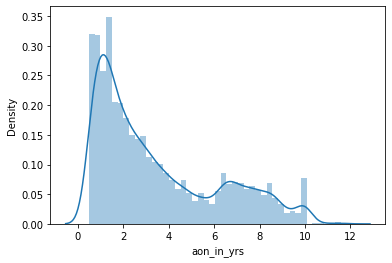

In [59]:
#Visualising aon_yrs column values
sns.distplot(hvc_data['aon_in_yrs'])
plt.show()

In [60]:
#Major chunk of the customers have been in the network for 1-2 years

In [61]:
#Deriving the feature count_of_service_packs that is the number of service packs used for availing night_pck, monthly2g, service schemes, monthly3g and Service scheme to avail services of Facebook and similar social networking sites

hvc_data['count_of_service_packs_6'] = hvc_data['night_pck_user_6']+ hvc_data['monthly_2g_6']+ hvc_data['sachet_2g_6'] + hvc_data['monthly_3g_6']+ hvc_data['sachet_3g_6']+ hvc_data['fb_user_6']
hvc_data['count_of_service_packs_7'] = hvc_data['night_pck_user_7']+ hvc_data['monthly_2g_7']+ hvc_data['sachet_2g_7'] + hvc_data['monthly_3g_7']+ hvc_data['sachet_3g_7']+ hvc_data['fb_user_7']
hvc_data['count_of_service_packs_8'] = hvc_data['night_pck_user_8']+ hvc_data['monthly_2g_8']+ hvc_data['sachet_2g_8'] + hvc_data['monthly_3g_8']+ hvc_data['sachet_3g_8']+ hvc_data['fb_user_8']

hvc_data[['count_of_service_packs_6','count_of_service_packs_7','count_of_service_packs_8']].head()

count_of_service_packs_6  count_of_service_packs_7  \
7                        0.0                       0.0   
8                        0.0                       3.0   
13                       0.0                       0.0   
16                       0.0                       0.0   
17                       0.0                       0.0   

    count_of_service_packs_8  
7                        0.0  
8                        4.0  
13                       4.0  
16                       0.0  
17                       0.0

In [62]:
hvc_data[['count_of_service_packs_6','count_of_service_packs_7','count_of_service_packs_8']].describe()

count_of_service_packs_6  count_of_service_packs_7  \
count              30011.000000              30011.000000   
mean                   1.288294                  1.409517   
std                    2.488907                  2.710397   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  2.000000   
max                   62.000000                 55.000000   

       count_of_service_packs_8  
count              30011.000000  
mean                   1.372530  
std                    2.689305  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    2.000000  
max                   61.000000

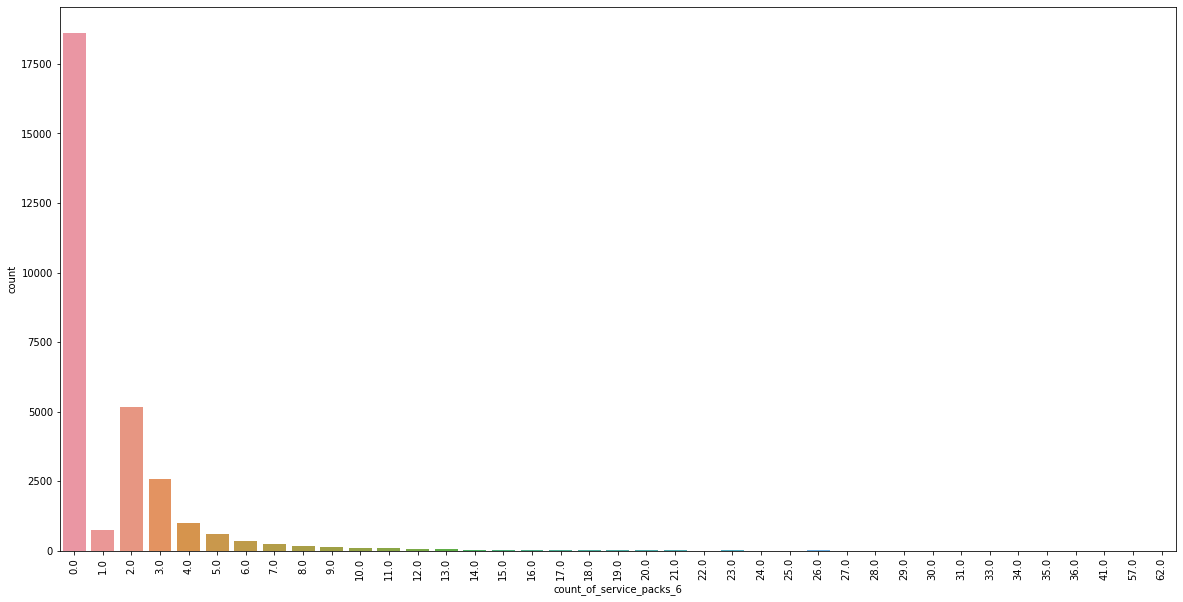

In [63]:
plt.figure(figsize=(20,10))
sns.countplot(hvc_data['count_of_service_packs_6'])
plt.xticks(rotation=90)
plt.show()

In [64]:
#Most of the customers did not avail service packs

### EDA

In [65]:
##Checking for duplicate rows

hvc_data.duplicated().sum()

0

In [66]:
#We observe there are no duplicate rows in the dataset

#### Univariate Analysis

In [67]:
#checking the churn column

In [68]:
hvc_data['churn'].value_counts(normalize=True)

0    0.913598
1    0.086402
Name: churn, dtype: float64

In [69]:
#91% have value 0 for churn

In [70]:
#Churn Rate
churn_rate = (sum(hvc_data['churn'])/hvc_data.shape[0])*100
churn_rate

8.64016527273333

In [71]:
#churn rate is 8.64%. The data is highly imbalanced

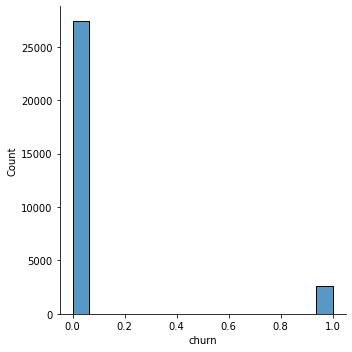

In [72]:
#Checking value counts in the column churn
sns.displot(hvc_data['churn'])
plt.show()

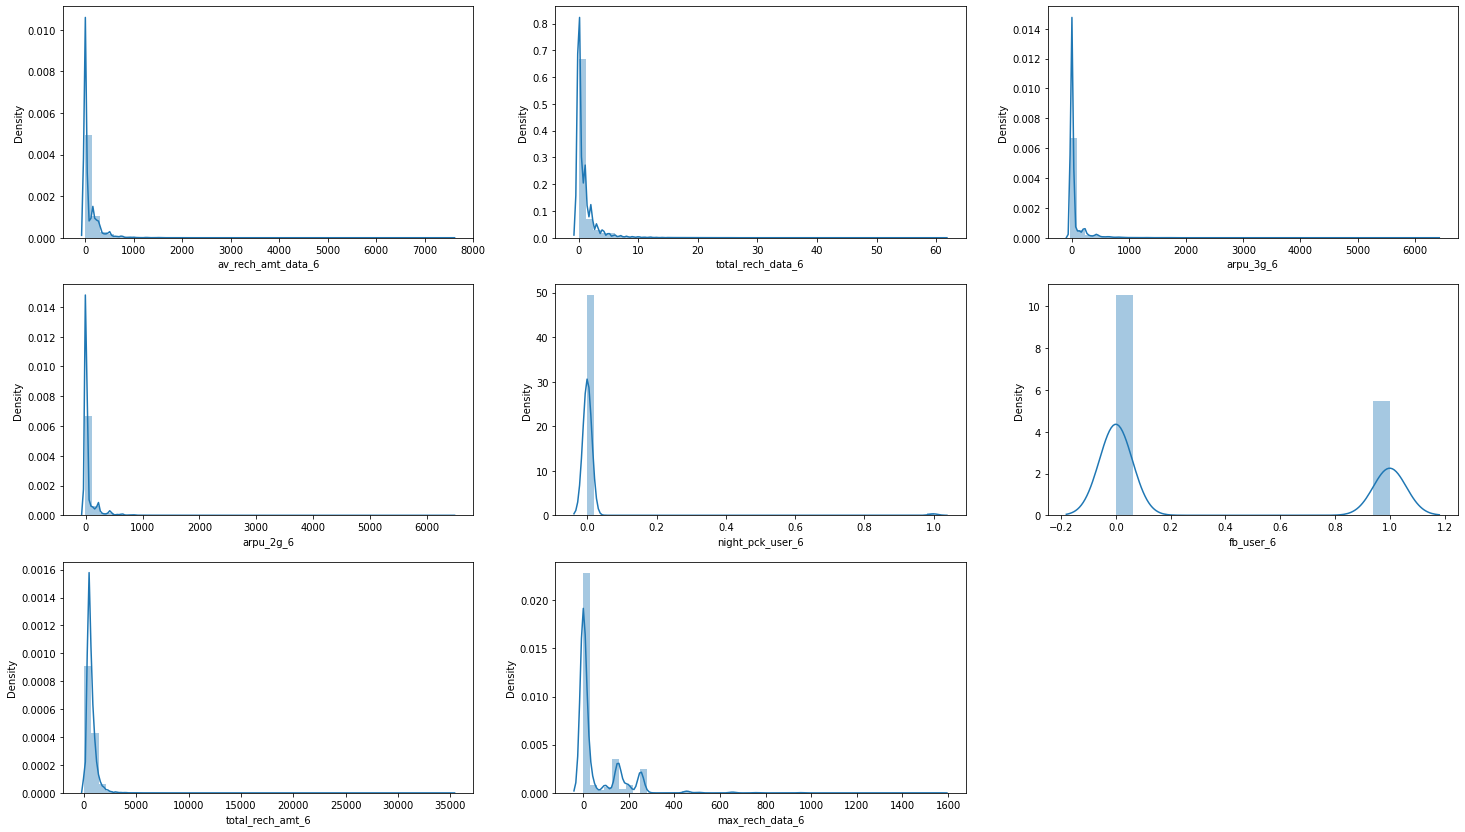

In [73]:
#Plotting distribution plots for numeric columns 
col=['av_rech_amt_data_6','total_rech_data_6','arpu_3g_6','arpu_2g_6' , 'night_pck_user_6' ,'fb_user_6','total_rech_amt_6',
'max_rech_data_6']

plt.figure(figsize=(25,40))
plt.subplot(8,3,1)
sns.distplot(hvc_data['av_rech_amt_data_6'])
plt.subplot(8,3,2)
sns.distplot(hvc_data['total_rech_data_6'])
plt.subplot(8,3,3)
sns.distplot(hvc_data['arpu_3g_6'])
plt.subplot(8,3,4)
sns.distplot(hvc_data['arpu_2g_6'])
plt.subplot(8,3,5)
sns.distplot(hvc_data['night_pck_user_6'])
plt.subplot(8,3,6)
sns.distplot(hvc_data['fb_user_6'])
plt.subplot(8,3,7)
sns.distplot(hvc_data['total_rech_amt_6'])
plt.subplot(8,3,8)
sns.distplot(hvc_data['max_rech_data_6'])
plt.show()

We observe the plots are skewed. They have peaks at 0

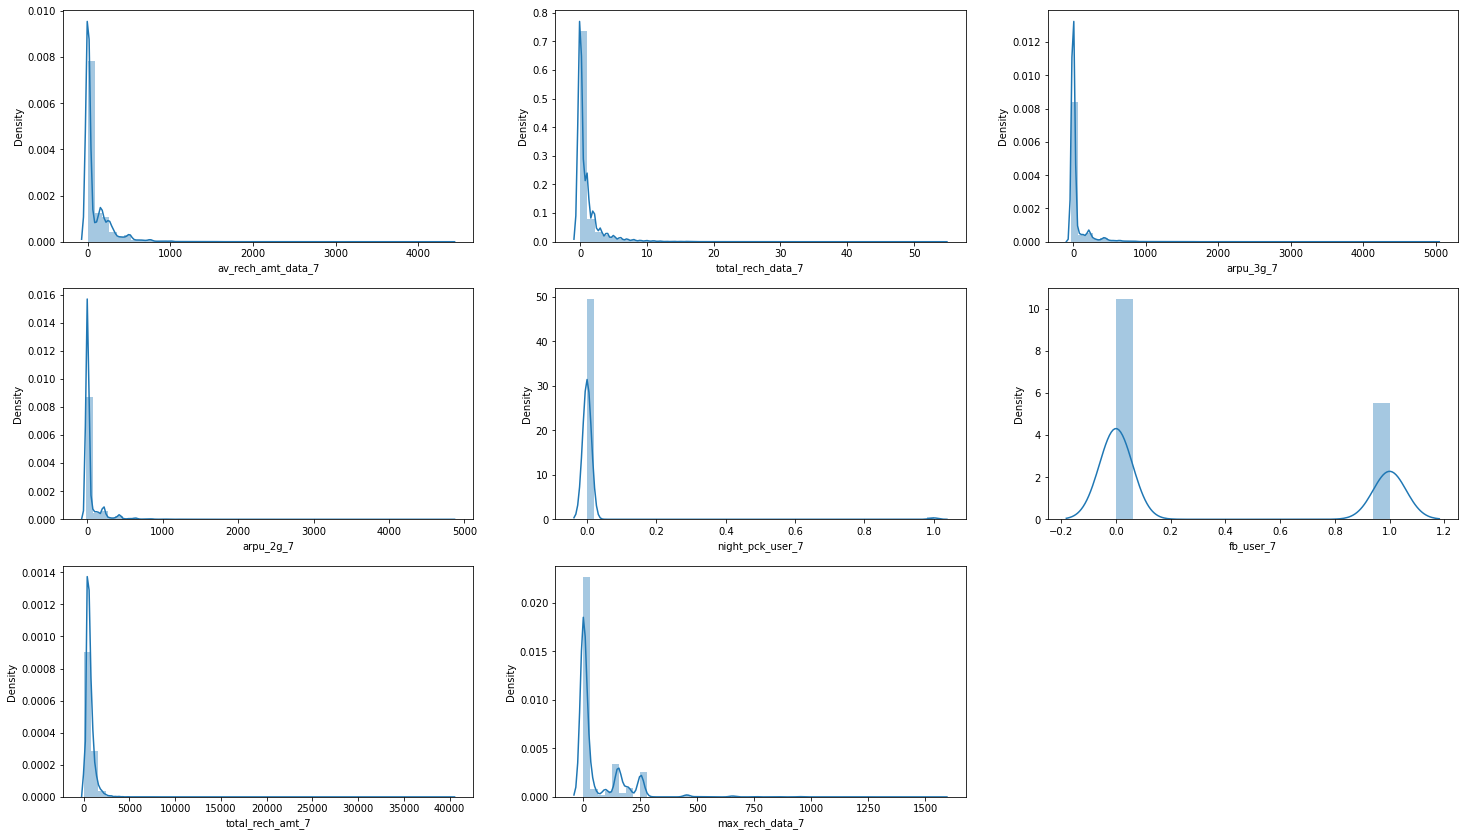

In [74]:
#Plotting distribution plots for numeric columns to visualise data
plt.figure(figsize=(25,40))
plt.subplot(8,3,1)
sns.distplot(hvc_data['av_rech_amt_data_7'])
plt.subplot(8,3,2)
sns.distplot(hvc_data['total_rech_data_7'])
plt.subplot(8,3,3)
sns.distplot(hvc_data['arpu_3g_7'])
plt.subplot(8,3,4)
sns.distplot(hvc_data['arpu_2g_7'])
plt.subplot(8,3,5)
sns.distplot(hvc_data['night_pck_user_7'])
plt.subplot(8,3,6)
sns.distplot(hvc_data['fb_user_7'])
plt.subplot(8,3,7)
sns.distplot(hvc_data['total_rech_amt_7'])
plt.subplot(8,3,8)
sns.distplot(hvc_data['max_rech_data_7'])
plt.show()

We observe the distribution plots are skewed. They have peaks at 0. Most of customers did not avail service packs offered by the telecom company

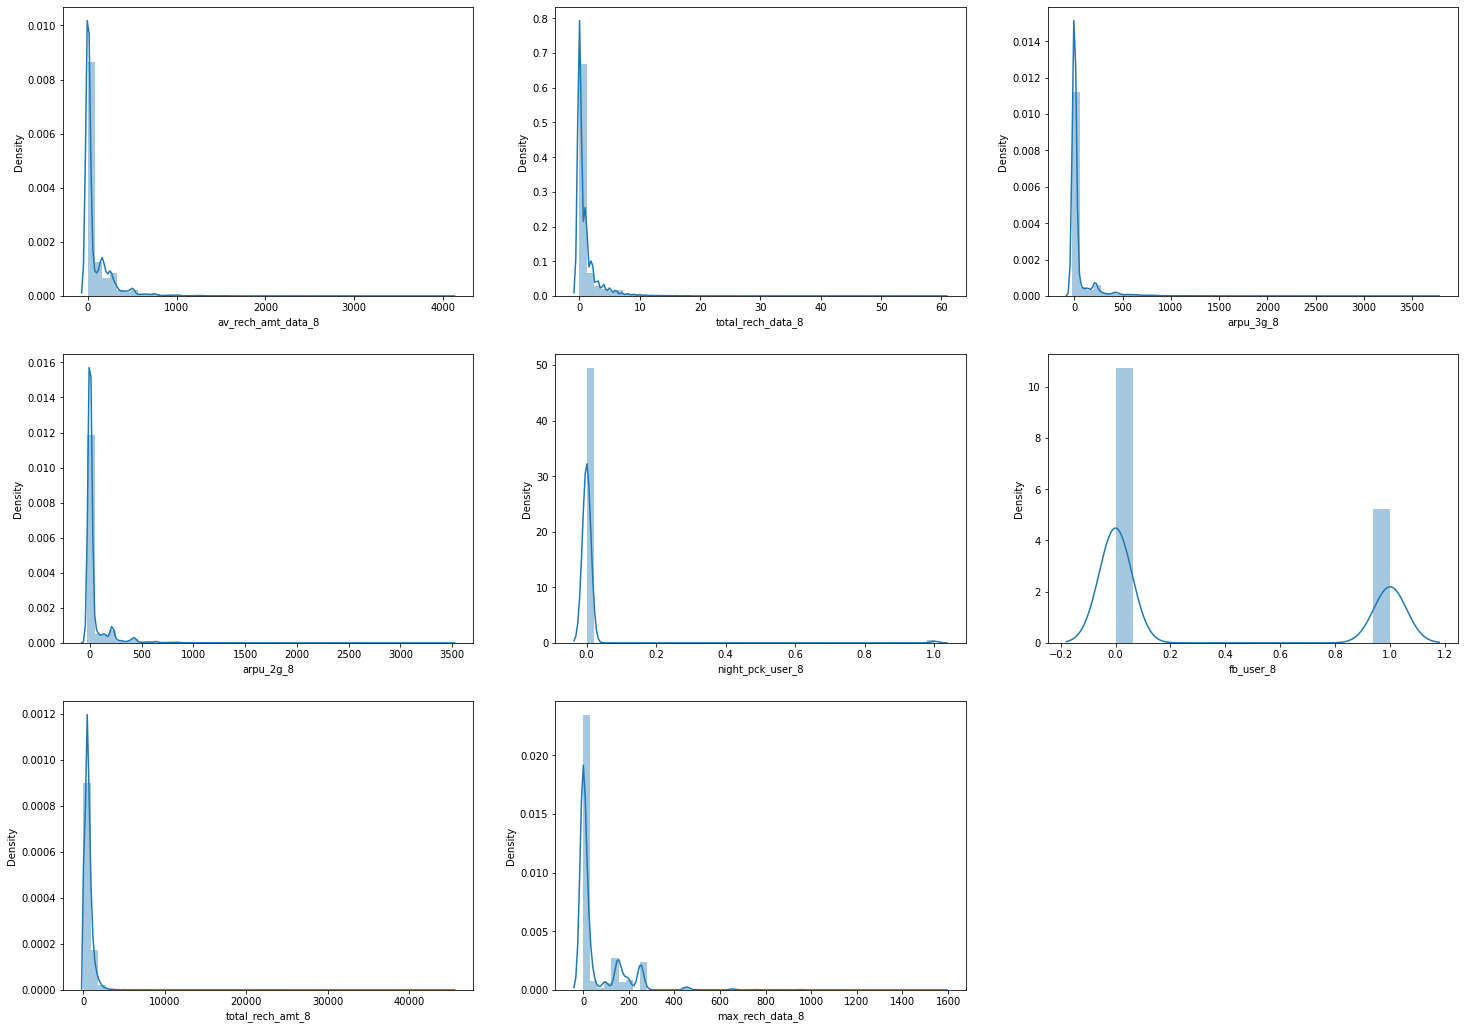

In [75]:
#Plotting distribution plots for numeric columns 
plt.figure(figsize=(25,50))
plt.subplot(8,3,1)
sns.distplot(hvc_data['av_rech_amt_data_8'])
plt.subplot(8,3,2)
sns.distplot(hvc_data['total_rech_data_8'])
plt.subplot(8,3,3)
sns.distplot(hvc_data['arpu_3g_8'])
plt.subplot(8,3,4)
sns.distplot(hvc_data['arpu_2g_8'])
plt.subplot(8,3,5)
sns.distplot(hvc_data['night_pck_user_8'])
plt.subplot(8,3,6)
sns.distplot(hvc_data['fb_user_8'])
plt.subplot(8,3,7)
sns.distplot(hvc_data['total_rech_amt_8'])
plt.subplot(8,3,8)
sns.distplot(hvc_data['max_rech_data_8'])
plt.show()

**Many customers peaked at 0 for total_recharge amount. Suggesting they did not recharge for the respective month. Hence they did not avail any service packs**

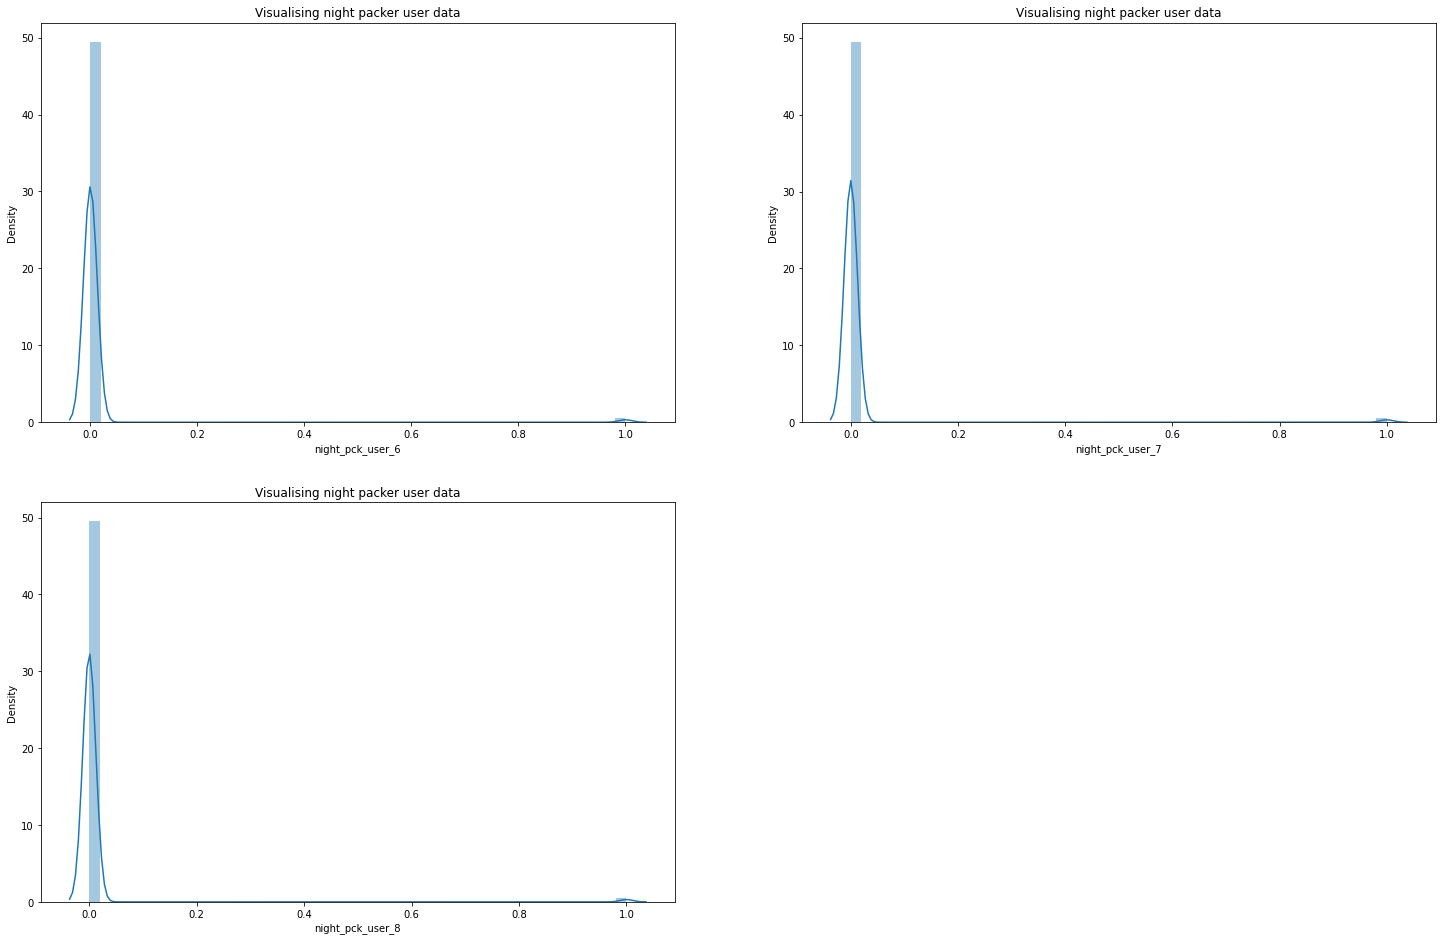

In [76]:
#Plotting distribution plots fornight pack user data columns for months 6,7,8
plt.figure(figsize=(25,25))
plt.subplot(3,2,1)

plt.subplot(3,2,1)
plt.title("Visualising night packer user data")
sns.distplot(hvc_data['night_pck_user_6'])
plt.subplot(3,2,2)
plt.title("Visualising night packer user data")
sns.distplot(hvc_data['night_pck_user_7'])
plt.subplot(3,2,3)
sns.distplot(hvc_data['night_pck_user_8'])
plt.title("Visualising night packer user data")
plt.show()

We can see that the data is centred around zero(high density).Most customers did not avail night pack addon services

In [77]:
#Checking values counts for night pack user columns for months 6,7,8

In [78]:
hvc_data['night_pck_user_7'].value_counts(normalize=True)

0.0    0.990137
1.0    0.009863
Name: night_pck_user_7, dtype: float64

In [79]:
hvc_data['night_pck_user_6'].value_counts(normalize=True)

0.0    0.989637
1.0    0.010363
Name: night_pck_user_6, dtype: float64

In [80]:
hvc_data['night_pck_user_8'].value_counts(normalize=True)

0.0    0.990703
1.0    0.009297
Name: night_pck_user_8, dtype: float64

#### Bivariate Analysis

<Figure size 1800x1800 with 0 Axes>

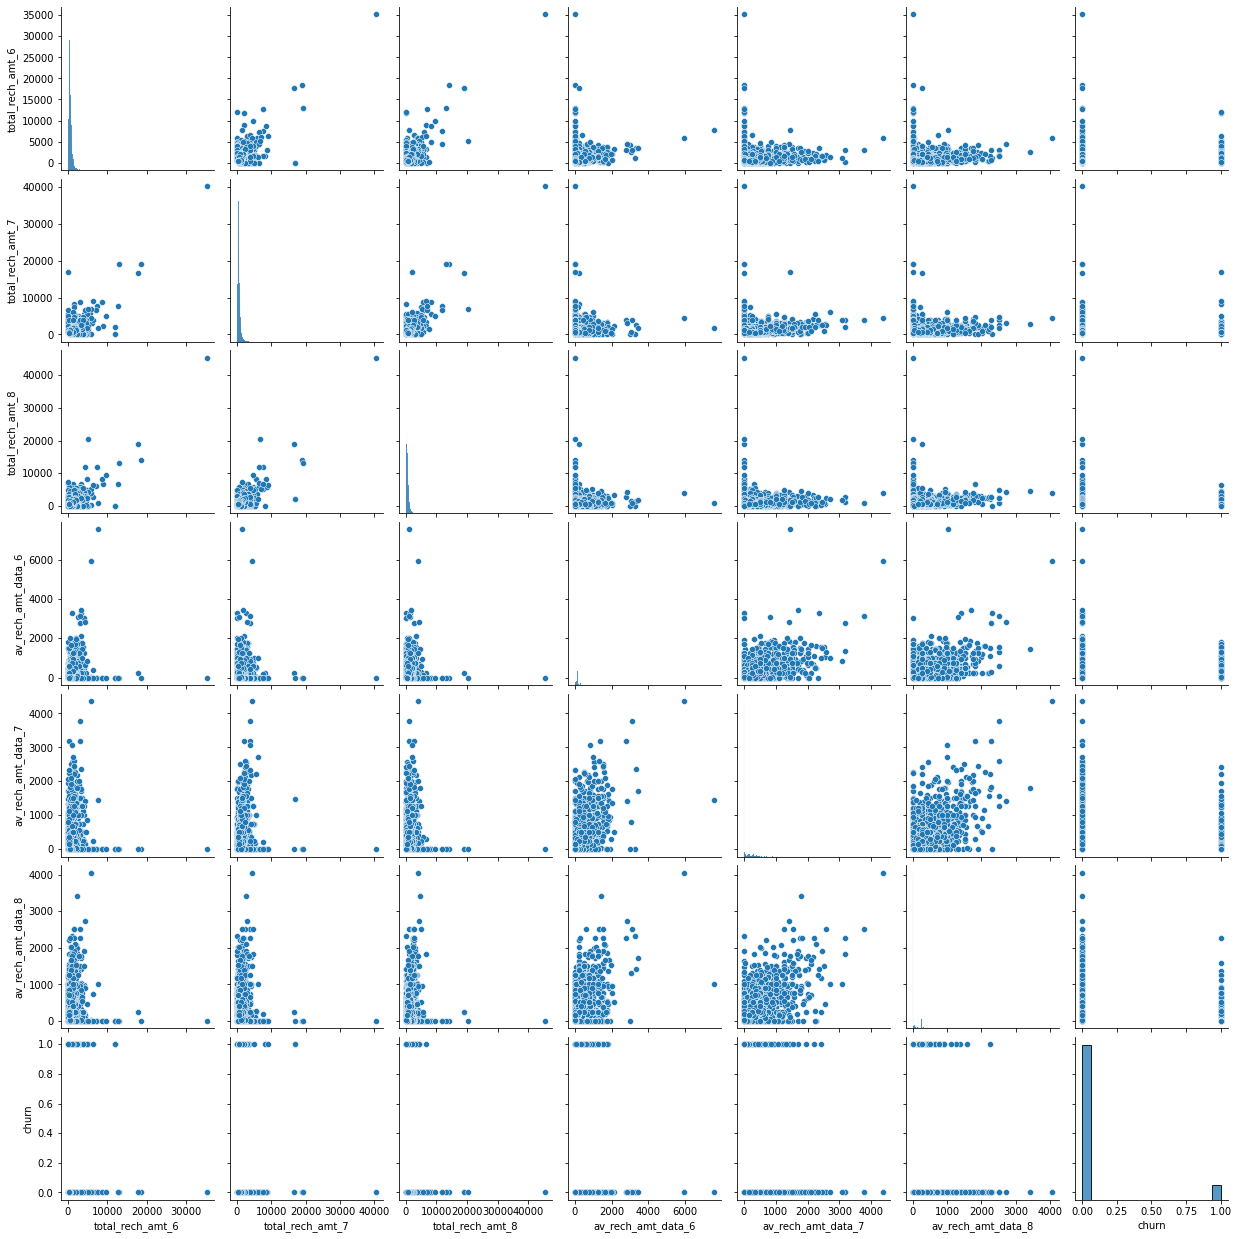

In [81]:
#Pairplot on numerical columns
col=['total_rech_amt_6', 'total_rech_amt_7','total_rech_amt_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','churn']
plt.figure(figsize=(25,25))
sns.pairplot(hvc_data[col])
plt.show()

In [82]:
#We observe some variables are linearly related

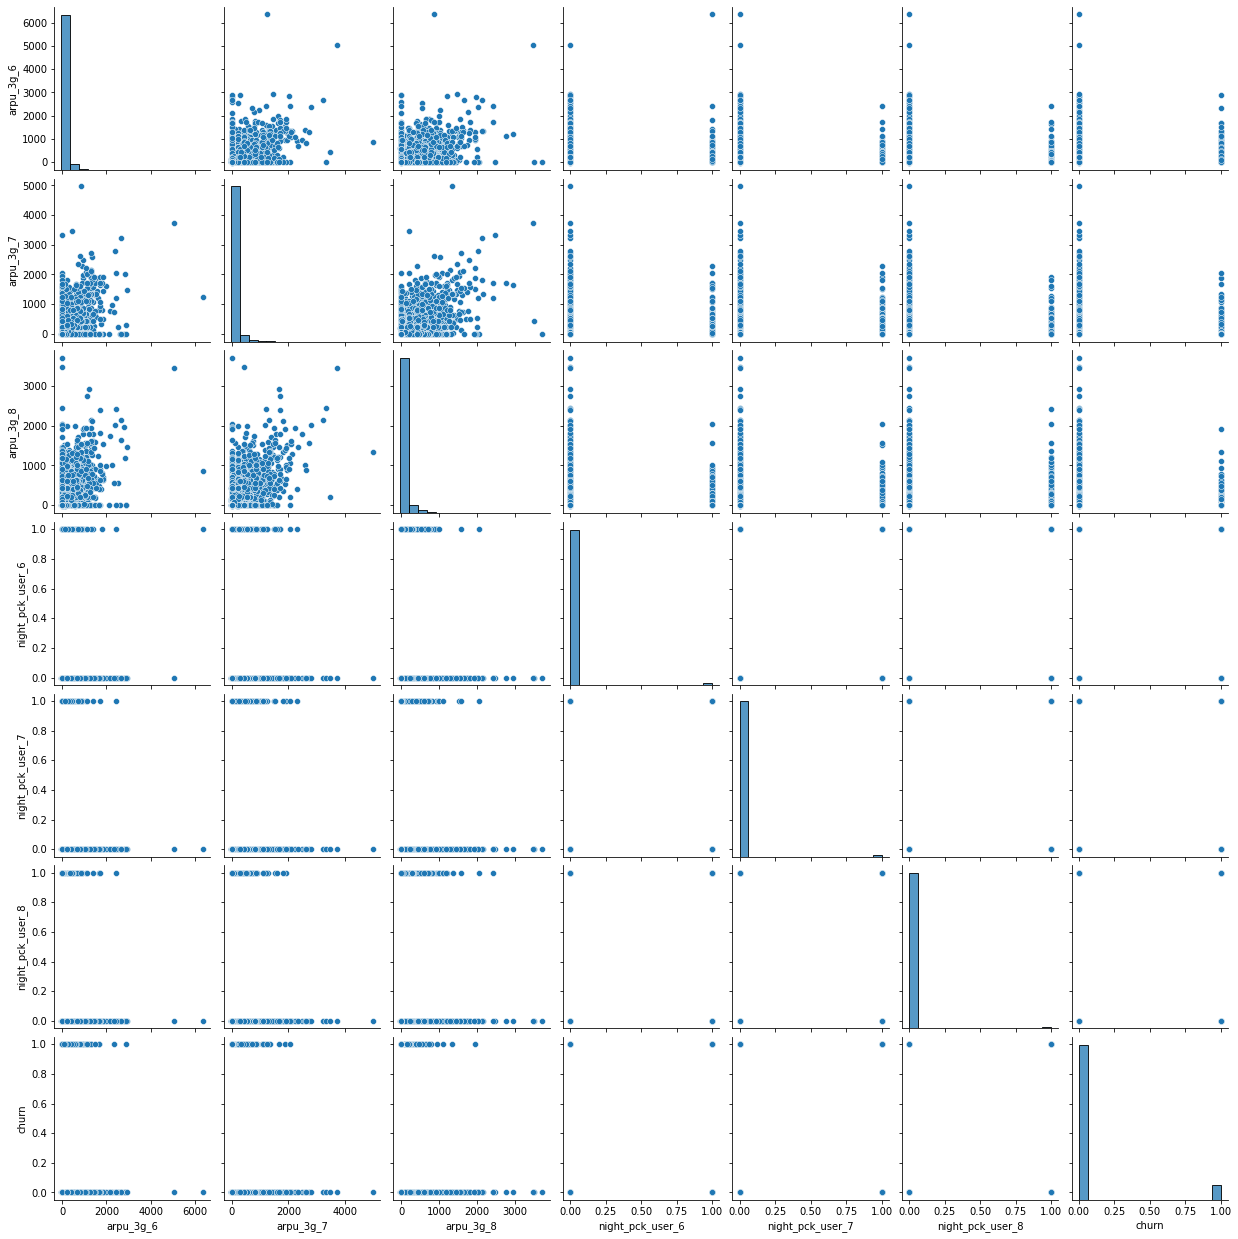

In [83]:
col=['arpu_3g_6','arpu_3g_7','arpu_3g_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','churn']
sns.pairplot(hvc_data[col])
plt.show()

In [84]:
# we can see linear relationship between 'arpu_3g_6','arpu_3g_7'

In [85]:
hvc_data.columns.tolist()

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

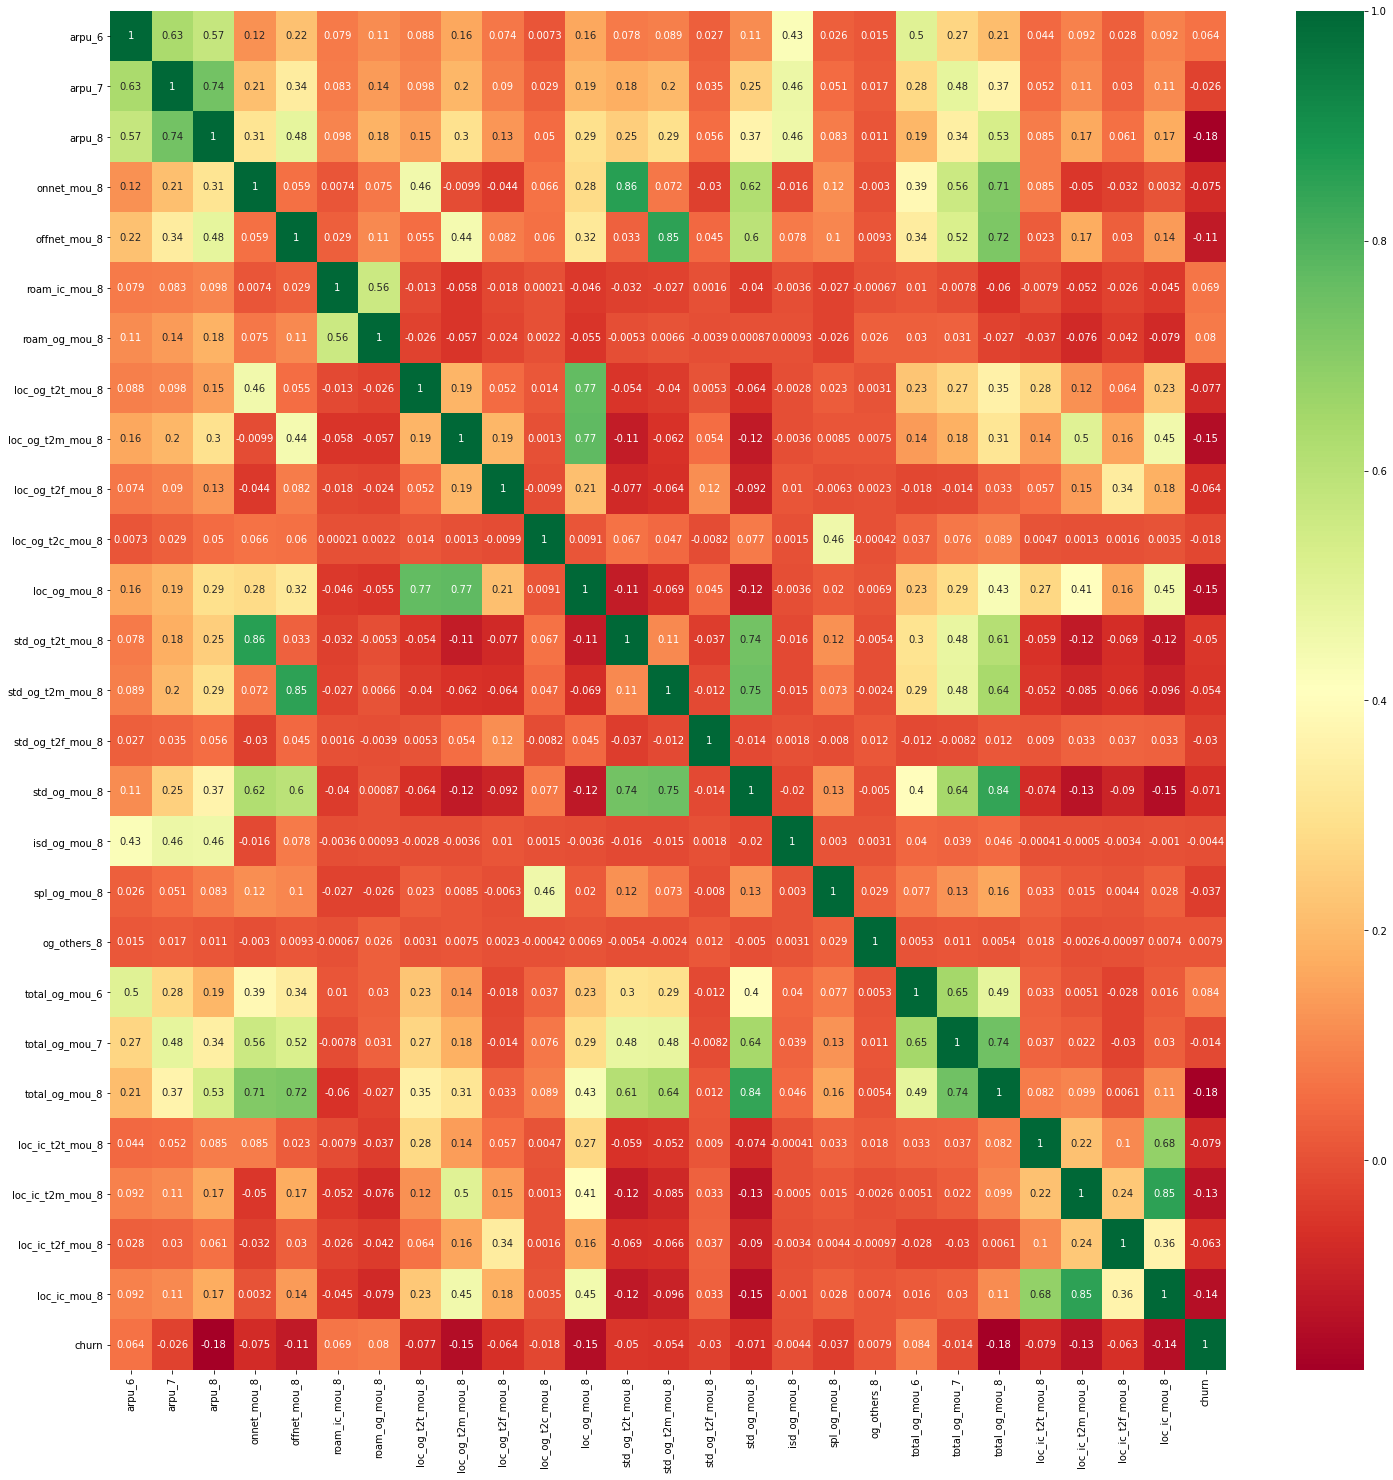

In [86]:
#Plotting heatmap to visualize correlations between variables
col=['arpu_6', 'arpu_7', 'arpu_8','onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8','std_og_t2f_mou_8',
 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',  'loc_ic_mou_8','churn']
plt.figure(figsize=(25,25))
sns.heatmap(hvc_data[col].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [87]:
#We observe strong correlations between 'std_og_t2t_mou_8', 'std_og_t2m_mou_8'
# Churn is negatively related to 'arpu_8' and 'total_og_mou_8'

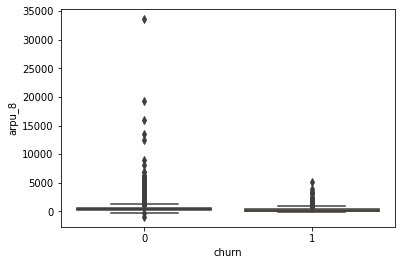

In [88]:
sns.boxplot(data=hvc_data,y='arpu_8',x='churn')
plt.show()

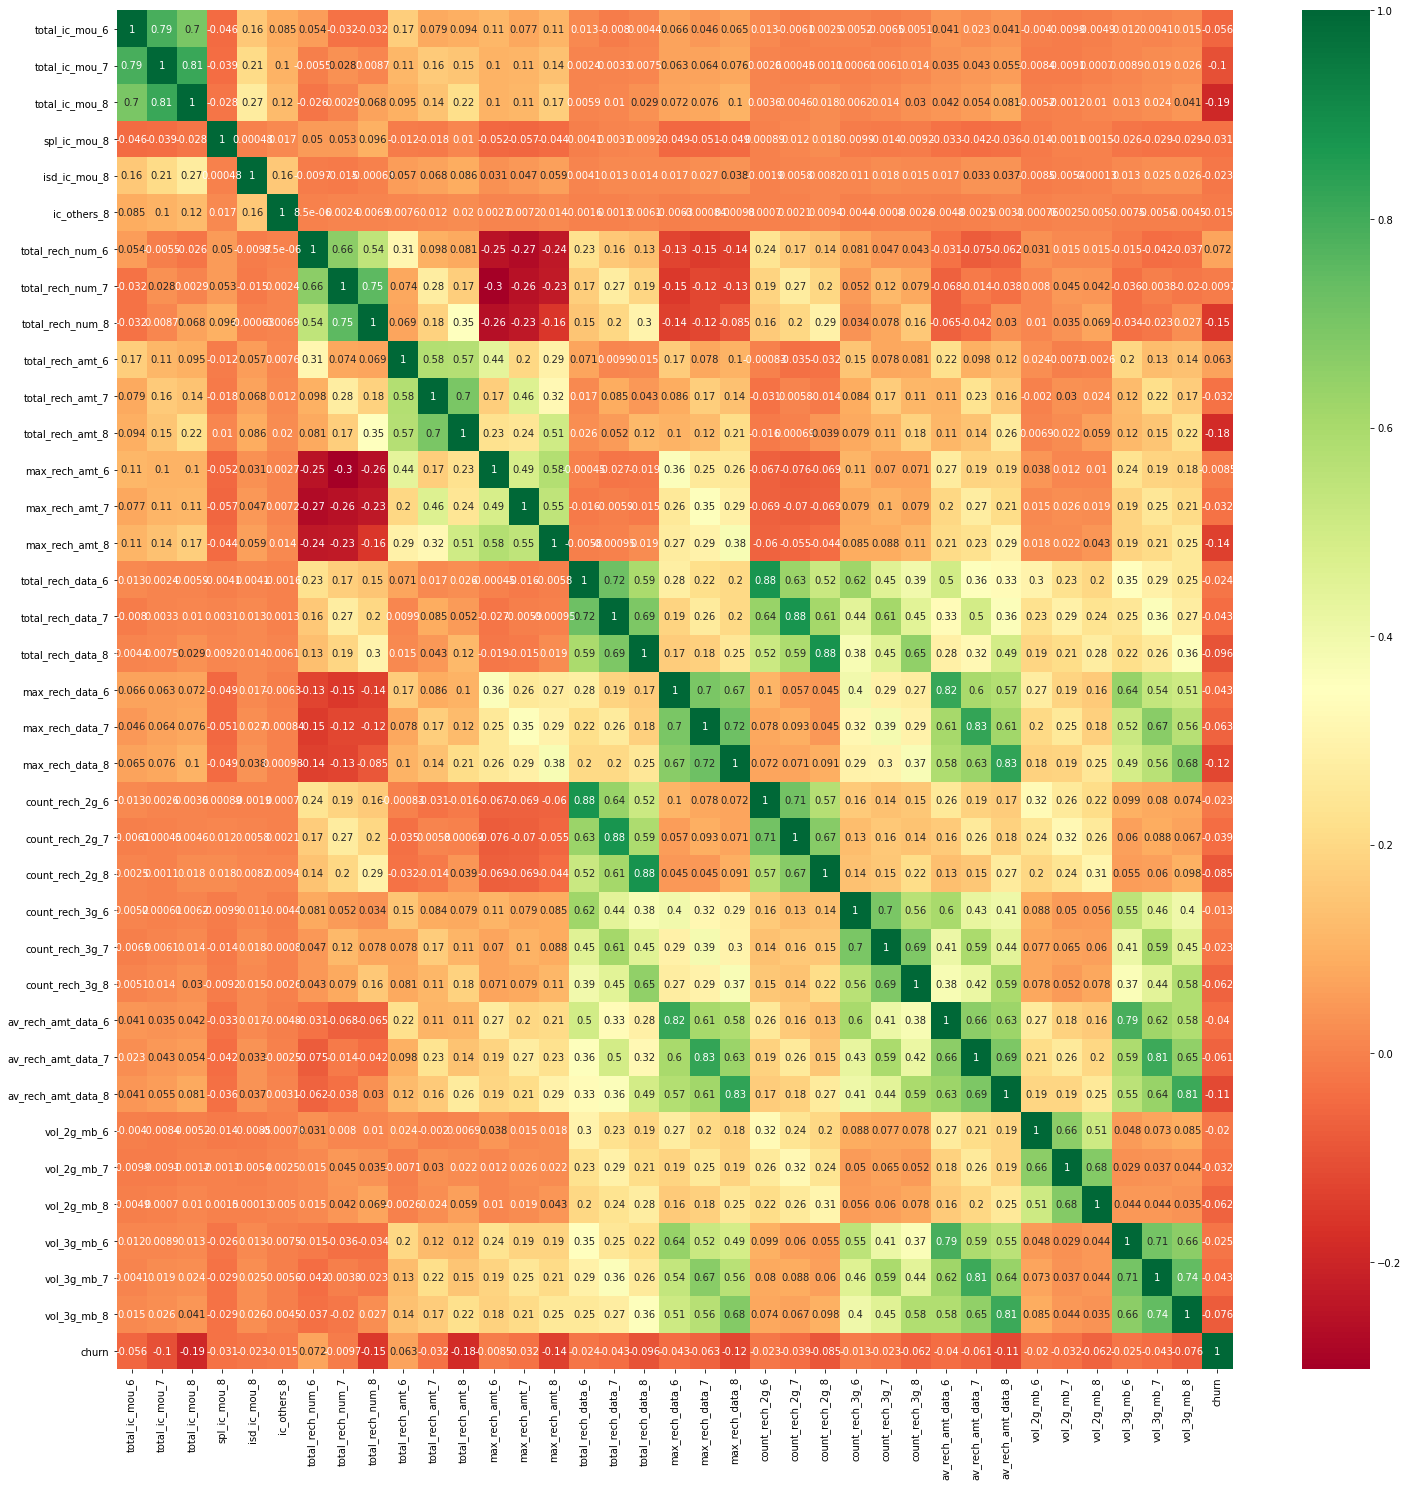

In [89]:
#Plotting heatmap to visualize correlations between variables
col=['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_6',
 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
 'max_rech_amt_7', 'max_rech_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6',
 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8','churn']
plt.figure(figsize=(25,25))
sns.heatmap(hvc_data[col].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [90]:
#We again observe strong correlations of 'av_rech_amt_data_7', 'av_rech_amt_data_8' and churn is weakly related to other columns

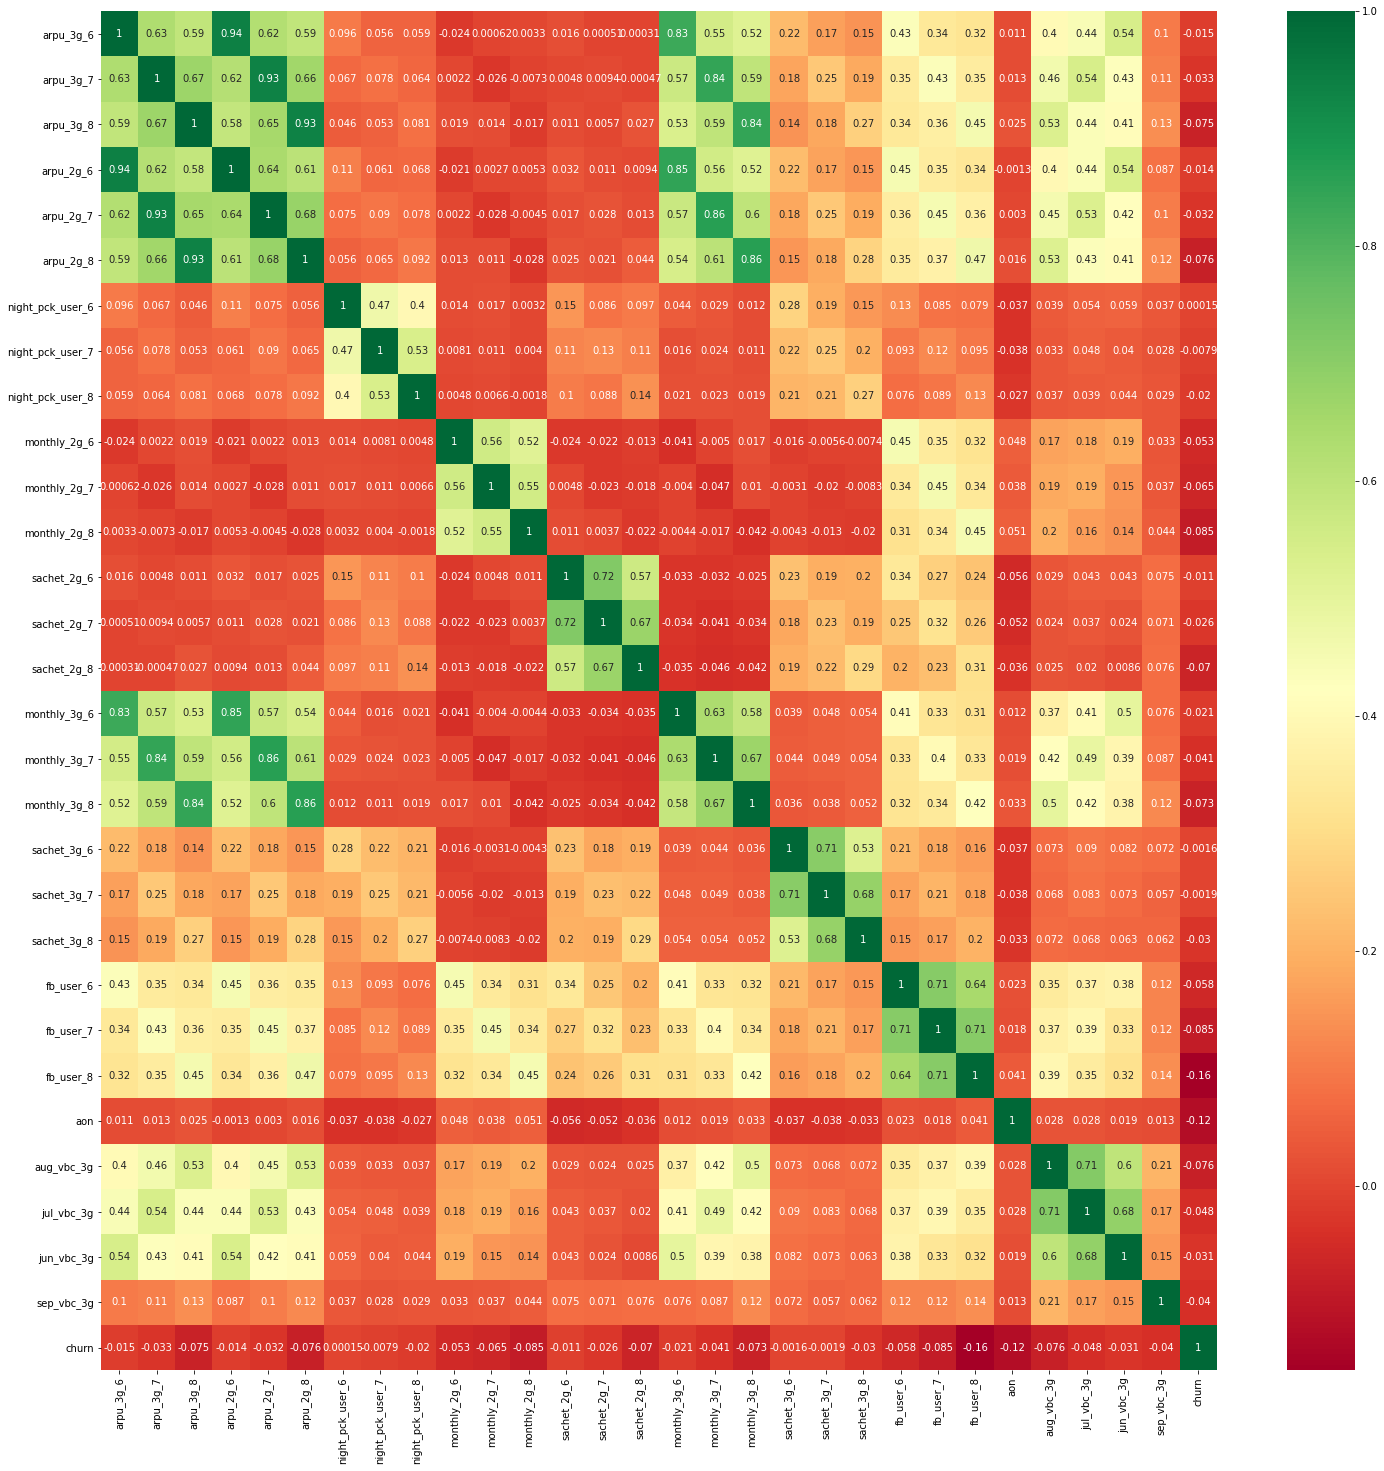

In [91]:
#Plotting heatmap to visualize correlations between variables

col=['arpu_3g_6', 'arpu_3g_7','arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7',
 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'churn']
plt.figure(figsize=(25,25))
sns.heatmap(hvc_data[col].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [92]:
# we observe strong relations between 'arpu_3g_6', 'arpu_3g_7','arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'

#### We will retain these correlated features as we will be performing Principal Component Analysis in the coming section that will be select top features in the dataset

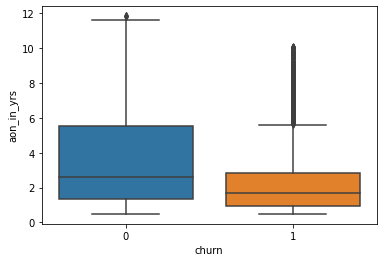

In [93]:
 #Box plot for age on network variable with the churn variable
    
sns.boxplot(data=hvc_data,x="churn",y="aon_in_yrs")
plt.show()

In [94]:
# cutomers churning out where in the network for 1-3 years
#customers not churning have been in the network for 1-5 years

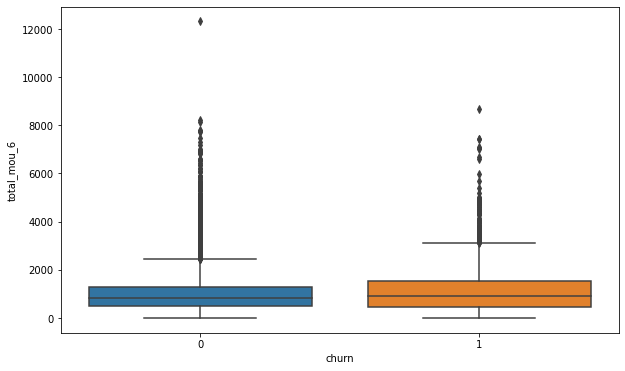

In [95]:
#Box plot for total minutes of usage for 6th month against churn

plt.figure(figsize=(10,6))
sns.boxplot(data=hvc_data ,x='churn',y='total_mou_6')
plt.show()

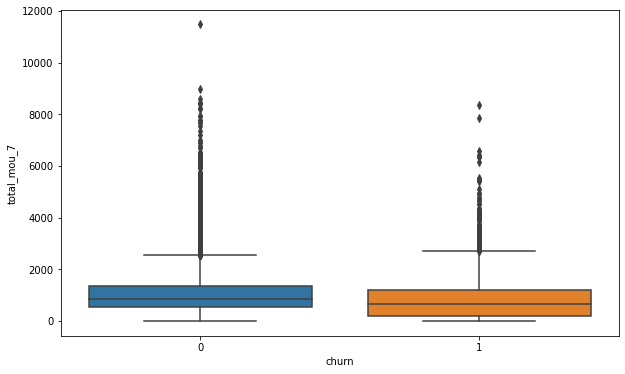

In [96]:
#Box plot for total minutes of usage for 7th month against churn

plt.figure(figsize=(10,6))
sns.boxplot(data=hvc_data ,x='churn',y='total_mou_7')
plt.show()

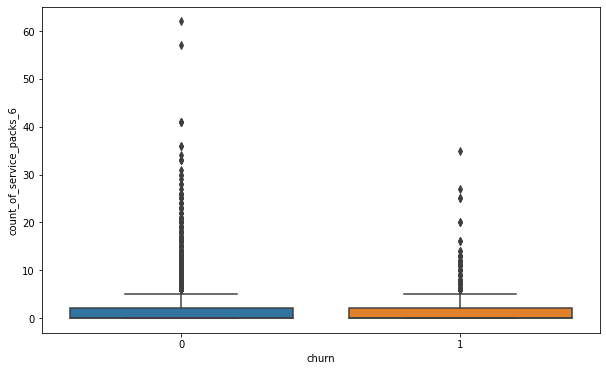

In [97]:


#Box plot for count_of_service_packs_6 for th month against churn

plt.figure(figsize=(10,6))
sns.boxplot(data=hvc_data ,x='churn',y='count_of_service_packs_6')
plt.show()

#### Handling Outlier 

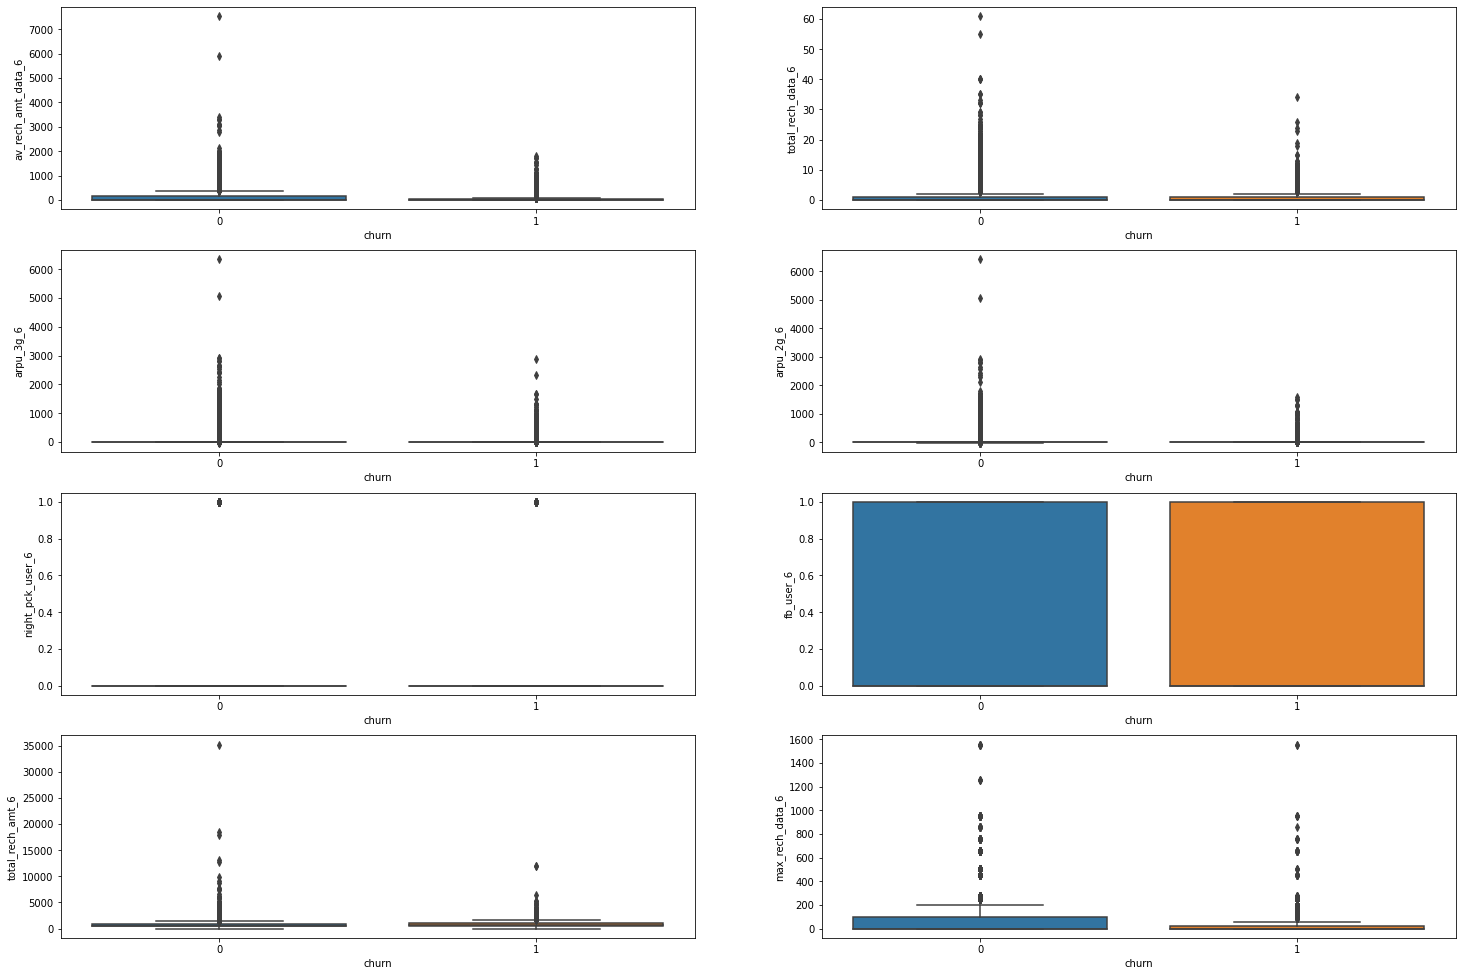

In [98]:
#Plotting Boxplots to look for outliers
plt.figure(figsize=(25,35))
plt.subplot(8,2,1)
sns.boxplot(y='av_rech_amt_data_6',  x='churn',data = hvc_data)
plt.subplot(8,2,2)
sns.boxplot(y = 'total_rech_data_6', x='churn',data = hvc_data)
plt.subplot(8,2,3)
sns.boxplot(y = 'arpu_3g_6',  x='churn', data = hvc_data)
plt.subplot(8,2,4)
sns.boxplot(y = 'arpu_2g_6', x='churn', data = hvc_data)
plt.subplot(8,2,5)
sns.boxplot(y = 'night_pck_user_6',  x='churn',data = hvc_data)
plt.subplot(8,2,6)
sns.boxplot(y = 'fb_user_6',  x='churn',data = hvc_data)
plt.subplot(8,2,7)
sns.boxplot(y = 'total_rech_amt_6',  x='churn',data = hvc_data)
plt.subplot(8,2,8)
sns.boxplot(y = 'max_rech_data_6',  x='churn',data = hvc_data)
plt.show()

In [99]:
#We can clearly see the outliers in the data
#customers who churned did not avail fb_user pack in month,night_pck_user_6

In [100]:
outlier_list=['av_rech_amt_data_6','total_rech_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','total_rech_amt_6','max_rech_data_6']

In [101]:
#Plotting Boxplots to look for outliers
plt.figure(figsize=(25,35))
plt.subplot(6,2,1)
sns.boxplot(y='onnet_mou_6', x='churn', data = hvc_data)
plt.subplot(6,2,2)
sns.boxplot(y = 'onnet_mou_7',x='churn', data = hvc_data)
plt.subplot(6,2,3)
sns.boxplot(y = 'onnet_mou_8',x='churn', data = hvc_data)
plt.subplot(6,2,4)
sns.boxplot(y = 'offnet_mou_6',x='churn', data = hvc_data)
plt.subplot(6,2,5)
sns.boxplot(y = 'offnet_mou_7',  x='churn',data = hvc_data)
plt.subplot(6,2,6)
sns.boxplot(y = 'offnet_mou_8', x='churn', data = hvc_data)

plt.show()

In [102]:
outlier_list.extend(['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8'])

In [103]:
# Checking outliers in the dataset at different percentiles 25%,50%,75%,90%,95% and 99%
hvc_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.001100e+04  30011.000000  30011.000000  30011.000000  30011.000000   
mean    7.001223e+09    587.284404    589.135427    534.857433    297.428519   
std     6.846405e+05    442.722413    462.897814    492.259586    460.077570   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
25%     7.000641e+09    364.161000    365.004500    289.609500     43.510000   
50%     7.001232e+09    495.682000    493.561000    452.091000    131.010000   
75%     7.001814e+09    703.922000    700.788000    671.150000    353.310000   
90%     7.002167e+09    994.099000    995.557000    985.202000    794.980000   
95%     7.002287e+09   1240.793500   1261.421500   1258.555500   1153.970000   
99%     7.002387e+09   1983.089500   1999.374500   1987.934400   2166.370000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean     305.692786    271.757920    420.017529    425.913802    381.165677   
std      481.112797    464.746919    469.169135    485.188800    473.875235   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       43.260000     33.985000    142.825000    141.235000    111.730000   
50%      130.440000    113.090000    282.190000    281.940000    240.940000   
75%      359.925000    297.735000    523.125000    532.695000    482.610000   
90%      824.380000    723.610000    915.580000    935.690000    853.790000   
95%     1208.175000   1115.660000   1271.470000   1286.285000   1188.460000   
99%     2220.367000   2188.504000   2326.290000   2410.104000   2211.642000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30011.000000   30011.000000   30011.000000   30011.000000   
mean       17.517532      13.594301      13.484214      29.468127   
std        79.136123      76.294290      74.522333     118.542689   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        32.730000      18.360000      18.680000      64.480000   
95%        94.585000      63.335000      62.795000     168.460000   
99%       349.353000     292.540000     288.485000     543.709000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30011.000000   30011.000000      30011.000000      30011.000000   
mean       22.135136      21.780945         95.176642         96.198935   
std        97.907859     106.195949        236.699751        247.995056   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          8.990000          9.760000   
50%         0.000000       0.000000         34.010000         34.690000   
75%         0.000000       0.000000         91.460000         91.480000   
90%        41.200000      37.110000        207.930000        207.840000   
95%       119.335000     114.800000        348.615000        346.900000   
99%       448.125000     432.743000       1076.242000       1059.875000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      30011.000000      30011.000000      30011.000000      30011.000000   
mean          88.574228        182.262426        182.194297        170.459025   
std          234.324946        249.600636        240.200081        233.353860   
min            0.000000          0.000000  

#### Applying Percentile transformations to handle outliers

In [104]:
for col in outlier_list:
    upper_limit = hvc_data[col].quantile(0.99)
    lower_limit = hvc_data[col].quantile(0.01)
    hvc_data[col] = np.where(hvc_data[col] >= upper_limit,
        upper_limit,
        np.where(hvc_data[col] <= lower_limit,
        lower_limit,
        hvc_data[col]))

In [105]:
hvc_data[outlier_list].describe()

av_rech_amt_data_6  total_rech_data_6     arpu_3g_6     arpu_2g_6  \
count        30011.000000       30011.000000  30011.000000  30011.000000   
mean            86.390521           0.880544     50.128199     46.429756   
std            157.249304           1.716967    137.705825    119.889494   
min              0.000000           0.000000      0.000000      0.000000   
25%              0.000000           0.000000      0.000000      0.000000   
50%              0.000000           0.000000      0.000000      0.000000   
75%            154.000000           1.000000      0.000000      2.200000   
max            778.300000          10.000000    798.301000    654.750000   

       night_pck_user_6  total_rech_amt_6  max_rech_data_6   onnet_mou_6  \
count      30011.000000      30011.000000     30011.000000  30011.000000   
mean           0.010363        685.032555        55.068808    288.751839   
std            0.101271        404.534358        94.209801    404.207801   
min            0.000000          0.000000         0.000000      0.000000   
25%            0.000000        432.000000         0.000000     43.510000   
50%            0.000000        584.000000         0.000000    131.010000   
75%            0.000000        837.000000        98.000000    353.310000   
max            1.000000       2376.000000       455.000000   2166.370000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000  
mean     296.394655    262.486825    412.227672    417.332386    371.222403  
std      419.083226    398.145303    420.176332    429.355445    401.551399  
min        0.000000      0.000000      1.062000      1.112000      0.000000  
25%       43.260000     33.985000    142.825000    141.235000    111.730000  
50%      130.440000    113.090000    282.190000    281.940000    240.940000  
75%      359.925000    297.735000    523.125000    532.695000    482.610000  
max     2220.367000   2188.504000   2326.290000   2410.104000   2211.642000

### Test Train Split

In [106]:
#Defining X,y
X = hvc_data.drop(['churn','mobile_number'], axis = 1)
y = hvc_data[['churn']]

In [107]:
# splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [108]:
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)
print(X_test.shape)

(21007, 159)
(9004, 1)
(21007, 1)
(9004, 159)


### Scaling the Data

In [109]:
X_train.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
337    507.136  375.783  268.960        53.01        52.64        37.48   
20790  384.551  334.829  408.306        91.39       216.14       150.58   
42083  517.438  227.380  447.803        11.96        14.13         0.40   
95072  414.381  429.050  614.523       532.66       537.31       738.21   
64915  639.443  498.495  513.858       122.68       105.51       149.33   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
337          316.01       195.740         68.36            0.0            0.0   
20790        504.19       301.980        434.41            0.0            0.0   
42083          1.51         1.112          0.00            0.0            0.0   
95072         49.03        71.640         39.43            0.0            0.0   
64915        302.23       211.440        264.11            0.0            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
337              0.0            0.0            0.0            0.0   
20790            0.0            0.0            0.0            0.0   
42083            0.0            0.0            0.0            0.0   
95072            0.0            0.0            0.0            0.0   
64915            0.0            0.0            0.0            0.0   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
337               53.01             52.64             37.48            282.38   
20790             40.36             36.21             27.73             37.26   
42083             11.96             14.13              0.40              1.51   
95072             24.46             19.79             37.74             41.26   
64915            122.68            105.51            149.33            301.04   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
337              171.64             44.51             31.59             17.38   
20790             36.73             59.61              0.00              0.00   
42083              0.00              0.00              0.00              0.00   
95072             47.86             39.43              1.19              4.04   
64915            194.06            257.14              0.00              0.66   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
337               19.43               0.0               0.0              0.00   
20790              0.00               0.0               0.0              0.58   
42083              0.00               0.0               0.0              0.00   
95072              0.00               0.0               0.0              0.00   
64915              0.51               0.0               0.0              0.00   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
337          366.99        241.68        101.43              0.00   
20790         77.63         72.94         87.34             51.03   
42083         13.48         14.13          0.40              0.00   
95072         66.93         71.71         77.18            508.19   
64915        423.73        300.24        406.99              0.00   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
337                0.00              0.00              0.00              2.11   
20790            179.93            122.84            465.96            265.24   
42083              0.00              0.00              0.00              0.00   
95072            517.51            700.46              6.56             18.24   
64915              0.00              0.00              1.18             15.75   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
337                0.00              2.03              4.59              4.41   
20790            356.44              0.00              0.00              0.00   
42083              0.00              0.00        

In [110]:
#instantiation object of standard scaler
scaler = StandardScaler()

In [111]:
col=X_train.columns

In [112]:
#Scaling continous values columns
X_train[col] = scaler.fit_transform(X_train[col])
#Scaling continous values columns in test set
X_test[col] = scaler.transform(X_test[col])

X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
337   -0.188096 -0.495150 -0.566795    -0.580831    -0.579531    -0.563324   
20790 -0.476402 -0.589802 -0.268997    -0.485662    -0.188859    -0.277097   
42083 -0.163867 -0.838137 -0.184588    -0.682620    -0.671548    -0.657164   
95072 -0.406245 -0.372040  0.171711     0.608529     0.578555     1.210044   
64915  0.123075 -0.211540 -0.043421    -0.408074    -0.453202    -0.280261   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
337       -0.229593     -0.515273     -0.749714      -0.221636       -0.17925   
20790      0.216937     -0.268435      0.157268      -0.221636       -0.17925   
42083     -0.975866     -0.967471     -0.919094      -0.221636       -0.17925   
95072     -0.863106     -0.803607     -0.821396      -0.221636       -0.17925   
64915     -0.262291     -0.478795     -0.264694      -0.221636       -0.17925   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
337        -0.176647      -0.256253      -0.232653       -0.21466   
20790      -0.176647      -0.256253      -0.232653       -0.21466   
42083      -0.176647      -0.256253      -0.232653       -0.21466   
95072      -0.176647      -0.256253      -0.232653       -0.21466   
64915      -0.176647      -0.256253      -0.232653       -0.21466   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
337           -0.176146         -0.180205         -0.237120          0.397475   
20790         -0.230514         -0.250449         -0.283756         -0.578870   
42083         -0.352572         -0.344849         -0.414480         -0.721267   
95072         -0.298849         -0.320651         -0.235876         -0.562937   
64915          0.123284          0.045834          0.297879          0.471800   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
337           -0.043054         -0.531489          1.098879          0.475434   
20790         -0.603271         -0.467326         -0.308251         -0.325262   
42083         -0.755793         -0.720623         -0.308251         -0.325262   
95072         -0.557053         -0.553076         -0.255244         -0.139139   
64915          0.050045          0.372029         -0.308251         -0.294856   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
337            0.678928         -0.232365         -0.200728         -0.231941   
20790         -0.343544         -0.232365         -0.200728         -0.154487   
42083         -0.343544         -0.232365         -0.200728         -0.231941   
95072         -0.343544         -0.232365         -0.200728         -0.231941   
64915         -0.316706         -0.232365         -0.200728         -0.231941   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
337        0.223248     -0.115622     -0.465567         -0.460763   
20790     -0.550621     -0.578088     -0.506123         -0.337375   
42083     -0.722185     -0.739268     -0.756365         -0.460763   
95072     -0.579237     -0.581459     -0.535367          0.768007   
64915      0.374995      0.044874      0.413936         -0.460763   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
337           -0.462779         -0.423127         -0.499844         -0.482975   
20790         -0.047687         -0.122975          0.640178          0.113095   
42083         -0.462779         -0.423127         -0.499844         -0.487755   
95072          0.731098          1.288407         -0.483794         -0.446436   
64915         -0.462779         -0.423127         -0.496957         -0.452076   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
337           -0.442698          0.011511          0.212709          0.227008   
20790          0.417050         -0.172724         -0.157016         -0.153669   
42083         -0.442698         

## Modelling

#### We need to build 2 types of models
- Interpretable Model - using Logistic Regression
- High Performance Model by tuning Hyperparameters
    - Logistic Regression with PCA
    - Random Forest with PCA
    - Decision Tree with PCA


### Building 1st Interpretable Model using Logistic Regression with all columns

In [113]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20861
Model Family:                Binomial   Df Model:                          145
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3623.8
Date:                Mon, 22 Nov 2021   Deviance:                       7247.5
Time:                        20:04:51   Pearson chi2:                 9.09e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.0605      0.078    -52.299      0.000      -4.213      -3.908
arpu_6                       0.0189      0.098      0.194      0.846      -0.172       0.210
arpu_7                       0.0851      0.136      0.628      0.530      -0.181       0.351
arpu_8                       0.5425      0.173      3.144      0.002       0.204       0.881
onnet_mou_6                  0.1380      0.108      1.279      0.201      -0.073       0.349
onnet_mou_7                 -0.0288      0.132     -0.218      0.828      -0.288       0.230
onnet_mou_8                 -0.4990      0.140     -3.552      0.000      -0.774      -0.224
offnet_mou_6                 0.1651      0.144      1.146      0.252      -0.117       0.447
offnet_mou_7                -0.0437      0.137     -0.319      0.749      -0.312       0.224
offnet_mou_8                -0.3779      0.137     -2.764      0.006      -0.646      -0.110
roam_ic_mou_6                0.0009      0.036      0.024      0.981      -0.071       0.072
roam_ic_mou_7                0.1097      0.042      2.633      0.008       0.028       0.191
roam_ic_mou_8               -0.0461      0.035     -1.336      0.181      -0.114       0.022
roam_og_mou_6                0.0201      0.047      0.428      0.669      -0.072       0.112
roam_og_mou_7                0.0963      0.045      2.161      0.031       0.009       0.184
roam_og_mou_8                0.1045      0.041      2.543      0.011       0.024       0.185
loc_og_t2t_mou_6           313.9598   1353.472      0.232      0.817   -2338.796    2966.716
loc_og_t2t_mou_7            44.7668   1373.943      0.033      0.974   -2648.112    2737.646
loc_og_t2t_mou_8          4369.8208   1377.747      3.172      0.002    1669.487    7070.155
loc_og_t2m_mou_6           338.4123   1460.410      0.232      0.817   -2523.938    3200.763
loc_og_t2m_mou_7            46.1166   1414.595      0.033      0.974   -2726.438    2818.671
loc_og_t2m_mou_8          4918.7749   1550.874      3.172      0.002    1879.118    7958.431
loc_og_t2f_mou_6            30.2414    130.601      0.232      0.817    -225.732     286.214
loc_og_t2f_mou_7             4.0407    127.512      0.032      0.975    -245.879     253.960
loc_og_t2f_mou_8           397.2411    125.238      3.172      0.002     151.778     642.704
loc_og_t2c_mou_6            -0.0094      0.033     -0.286      0.775      -0.074       0.055
loc_og_t2c_mou_7            -0.0108      0.046     -0.237      0.813      -0.100       0.079
loc_og_t2c_mou_8             0.0207      0.046      0.448      0.654      -0.070       0.111
loc_og_mou_6               262.2996   2315.835      0.113      0.910   -4276.653    4801.252
loc_og_mou_7               293.2802   2308.713      0.127      0.899   -4231.713    4818.274
loc_og_mou_8  

Many variables have high pvalues. 

## Resampling the dataset to handle Class Imbalance

In [114]:
# Concatenate the data back
X = pd.concat([X_train,y_train],axis=1)

In [115]:
# Separating the classes in churn variable
not_churn = X[X['churn']==0]
yes_churn = X[X['churn']==1]

In [116]:
# Resampling the data
churn_upsampled = resample(yes_churn,replace=True,n_samples=len(not_churn),random_state=42)

In [117]:
# Concatenating the upsampled data frame with the not_churn dataset
upsampled = pd.concat([churn_upsampled,not_churn])

In [118]:
# Checking the counts
upsampled['churn'].value_counts()

1    19187
0    19187
Name: churn, dtype: int64

#### We will build the model with this sampled data as it has equal represenation for churn classes

## Model Building

In [119]:
y_train = upsampled['churn']
X_train = upsampled.drop('churn',axis=1)

#### Feature Selection Using RFE

In [120]:
#Building a Logistic Regression Model with 20 variables
logreg = LogisticRegression()
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False  True False False False  True False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False  True False False  True
 False False False  True False False False False False False False False
 False False False  True  True False False False False False  True  True
 False False False False False  True False False False False False False
 False False False False False  True  True False  True False False False
 False False  True False False False False False False False False  True
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True False  True False
 False False False]
[ 62  39   1   2  60   3   1  8

In [121]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 62),
 ('arpu_7', False, 39),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 2),
 ('onnet_mou_7', False, 60),
 ('onnet_mou_8', False, 3),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', False, 83),
 ('offnet_mou_8', False, 5),
 ('roam_ic_mou_6', False, 118),
 ('roam_ic_mou_7', False, 52),
 ('roam_ic_mou_8', False, 130),
 ('roam_og_mou_6', False, 126),
 ('roam_og_mou_7', False, 29),
 ('roam_og_mou_8', False, 6),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2t_mou_7', False, 30),
 ('loc_og_t2t_mou_8', False, 8),
 ('loc_og_t2m_mou_6', False, 96),
 ('loc_og_t2m_mou_7', False, 105),
 ('loc_og_t2m_mou_8', False, 9),
 ('loc_og_t2f_mou_6', False, 87),
 ('loc_og_t2f_mou_7', False, 70),
 ('loc_og_t2f_mou_8', False, 97),
 ('loc_og_t2c_mou_6', False, 139),
 ('loc_og_t2c_mou_7', False, 114),
 ('loc_og_t2c_mou_8', False, 92),
 ('loc_og_mou_6', False, 89),
 ('loc_og_mou_7', False, 68),
 ('loc_og_mou_8', False, 53),
 ('std_og_t2t_mou_6', False, 37),
 ('std_og_t2t_mou_7', False, 101),
 ('s

In [122]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8',
       ...
       'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'total_mou_7', 'aon_in_yrs', 'count_of_service_packs_6',
       'count_of_service_packs_7', 'count_of_service_packs_8'],
      dtype='object', length=139)

In [123]:
# Intialising col with features selected from RFE
col = X_train.columns[rfe.support_]
col

Index(['arpu_8', 'offnet_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'total_og_mou_6', 'total_og_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_8', 'isd_ic_mou_8', 'total_rech_amt_8',
       'max_rech_data_8', 'sep_vbc_3g', 'total_mou_6', 'total_mou_8'],
      dtype='object')

#### Assessing the model with StatsModels

In [124]:
# Building the model on the RFE selected columns
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38354
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16390.
Date:                Mon, 22 Nov 2021   Deviance:                       32780.
Time:                        20:07:35   Pearson chi2:                 1.97e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3777      0.023    -59.814      0.000      -1.423      -1.333
arpu_8               0.8658      0.056     15.486      0.000       0.756       0.975
offnet_mou_6         0.2557      0.023     11.163      0.000       0.211       0.301
loc_og_t2t_mou_6     0.5874      0.031     19.190      0.000       0.527       0.647
std_og_t2t_mou_8     0.8593      0.053     16.063      0.000       0.754       0.964
std_og_t2m_mou_8     0.5646      0.057      9.938      0.000       0.453       0.676
std_og_mou_6         1.0249      0.060     17.192      0.000       0.908       1.142
total_og_mou_6      -0.7215      0.045    -15.968      0.000      -0.810      -0.633
total_og_mou_7       0.5572      0.024     22.874      0.000       0.509       0.605
loc_ic_t2m_mou_7     0.6810      0.040     16.881      0.000       0.602       0.760
loc_ic_t2m_mou_8    -1.0237      0.084    -12.127      0.000      -1.189      -0.858
loc_ic_mou_8         4.3771      0.153     28.624      0.000       4.077       4.677
std_ic_mou_8         1.9852      0.068     29.007      0.000       1.851       2.119
total_ic_mou_6       0.4910      0.033     14.787      0.000       0.426       0.556
total_ic_mou_8      -4.9583      0.190    -26.103      0.000      -5.331      -4.586
isd_ic_mou_8         1.2111      0.037     32.777      0.000       1.139       1.284
total_rech_amt_8    -0.5650      0.053    -10.601      0.000      -0.669      -0.461
max_rech_data_8     -0.5903      0.020    -28.864      0.000      -0.630      -0.550
sep_vbc_3g          -0.5642      0.051    -10.983      0.000      -0.665      -0.464
total_mou_6         -0.3789      0.028    -13.305      0.000      -0.435      -0.323
total_mou_8         -2.8116      0.105    -26.675      0.000      -3.018      -2.605
====================================================================================
"""

In [ ]:
#We observe p-value of values are less than 0.05

#### Checking VIF's

In [125]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
6     total_og_mou_6    inf
18       total_mou_6    inf
12    total_ic_mou_6    inf
13    total_ic_mou_8  36.22
10      loc_ic_mou_8  20.48
19       total_mou_8  19.58
5       std_og_mou_6  15.39
0             arpu_8  12.92
15  total_rech_amt_8  12.79
9   loc_ic_t2m_mou_8   5.85
3   std_og_t2t_mou_8   5.04
4   std_og_t2m_mou_8   4.59
11      std_ic_mou_8   4.08
8   loc_ic_t2m_mou_7   2.94
2   loc_og_t2t_mou_6   2.78
1       offnet_mou_6   2.54
7     total_og_mou_7   2.49
14      isd_ic_mou_8   1.85
16   max_rech_data_8   1.22
17        sep_vbc_3g   1.04

In [126]:
#We observe few variables have high vif.  total_og_mou_6 has the highest vif

In [127]:
# Dropping the column
col = col.drop('total_og_mou_6', 1)
col

Index(['arpu_8', 'offnet_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'total_og_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_8', 'isd_ic_mou_8', 'total_rech_amt_8',
       'max_rech_data_8', 'sep_vbc_3g', 'total_mou_6', 'total_mou_8'],
      dtype='object')

In [128]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38354
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16390.
Date:                Mon, 22 Nov 2021   Deviance:                       32780.
Time:                        20:08:43   Pearson chi2:                 1.97e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3778      0.023    -59.799      0.000      -1.423      -1.333
arpu_8               0.8658      0.056     15.486      0.000       0.756       0.975
offnet_mou_6         0.2558      0.023     11.112      0.000       0.211       0.301
loc_og_t2t_mou_6     0.5875      0.031     19.175      0.000       0.527       0.648
std_og_t2t_mou_8     0.8593      0.053     16.064      0.000       0.754       0.964
std_og_t2m_mou_8     0.5646      0.057      9.934      0.000       0.453       0.676
std_og_mou_6         1.0250      0.060     17.146      0.000       0.908       1.142
total_og_mou_7       0.5573      0.024     22.812      0.000       0.509       0.605
loc_ic_t2m_mou_7     0.6810      0.040     16.876      0.000       0.602       0.760
loc_ic_t2m_mou_8    -1.0237      0.084    -12.142      0.000      -1.189      -0.858
loc_ic_mou_8         4.3771      0.153     28.667      0.000       4.078       4.676
std_ic_mou_8         1.9851      0.068     28.996      0.000       1.851       2.119
total_ic_mou_6       0.8843      0.054     16.344      0.000       0.778       0.990
total_ic_mou_8      -4.9583      0.190    -26.125      0.000      -5.330      -4.586
isd_ic_mou_8         1.2111      0.037     32.797      0.000       1.139       1.283
total_rech_amt_8    -0.5650      0.053    -10.604      0.000      -0.669      -0.461
max_rech_data_8     -0.5903      0.020    -28.815      0.000      -0.630      -0.550
sep_vbc_3g          -0.5643      0.051    -11.038      0.000      -0.664      -0.464
total_mou_6         -1.2434      0.082    -15.243      0.000      -1.403      -1.083
total_mou_8         -2.8118      0.105    -26.665      0.000      -3.019      -2.605
====================================================================================
"""

In [129]:
#All variables have p values less than 0.05

In [130]:
#Checking vif
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
12    total_ic_mou_8  36.22
17       total_mou_6  25.32
9       loc_ic_mou_8  20.48
18       total_mou_8  19.58
5       std_og_mou_6  15.39
0             arpu_8  12.92
14  total_rech_amt_8  12.79
11    total_ic_mou_6   8.06
8   loc_ic_t2m_mou_8   5.85
3   std_og_t2t_mou_8   5.04
4   std_og_t2m_mou_8   4.59
10      std_ic_mou_8   4.08
7   loc_ic_t2m_mou_7   2.94
2   loc_og_t2t_mou_6   2.78
1       offnet_mou_6   2.54
6     total_og_mou_7   2.49
13      isd_ic_mou_8   1.85
15   max_rech_data_8   1.22
16        sep_vbc_3g   1.04

In [131]:
# Few features have high vif values. total_ic_mou_8 has the highest vif

In [132]:
# Dropping the column total_ic_mou_8
col = col.drop('total_ic_mou_8', 1)
col

Index(['arpu_8', 'offnet_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'total_og_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_6', 'isd_ic_mou_8', 'total_rech_amt_8', 'max_rech_data_8',
       'sep_vbc_3g', 'total_mou_6', 'total_mou_8'],
      dtype='object')

In [133]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38355
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16796.
Date:                Mon, 22 Nov 2021   Deviance:                       33593.
Time:                        20:09:22   Pearson chi2:                 5.69e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.4884      0.023    -63.897      0.000      -1.534      -1.443
arpu_8               0.9366      0.057     16.400      0.000       0.825       1.049
offnet_mou_6         0.2737      0.023     11.980      0.000       0.229       0.318
loc_og_t2t_mou_6     0.6090      0.035     17.256      0.000       0.540       0.678
std_og_t2t_mou_8     2.0410      0.043     47.951      0.000       1.958       2.124
std_og_t2m_mou_8     1.7550      0.047     37.569      0.000       1.663       1.847
std_og_mou_6         0.5752      0.057     10.036      0.000       0.463       0.688
total_og_mou_7       0.6017      0.025     24.264      0.000       0.553       0.650
loc_ic_t2m_mou_7     0.4831      0.037     12.934      0.000       0.410       0.556
loc_ic_t2m_mou_8    -0.6689      0.075     -8.960      0.000      -0.815      -0.523
loc_ic_mou_8         1.4336      0.072     19.860      0.000       1.292       1.575
std_ic_mou_8         0.5655      0.031     18.370      0.000       0.505       0.626
total_ic_mou_6       0.5298      0.051     10.396      0.000       0.430       0.630
isd_ic_mou_8         0.4522      0.018     24.601      0.000       0.416       0.488
total_rech_amt_8    -0.5995      0.055    -10.972      0.000      -0.707      -0.492
max_rech_data_8     -0.5514      0.020    -27.627      0.000      -0.591      -0.512
sep_vbc_3g          -0.6011      0.052    -11.482      0.000      -0.704      -0.498
total_mou_6         -0.7169      0.079     -9.090      0.000      -0.872      -0.562
total_mou_8         -5.2203      0.082    -63.994      0.000      -5.380      -5.060
====================================================================================
"""

In [134]:
#All pvalues are less than 0.05

In [135]:
#Checking vif
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
16       total_mou_6  24.27
5       std_og_mou_6  14.55
0             arpu_8  12.89
13  total_rech_amt_8  12.77
17       total_mou_8  11.63
11    total_ic_mou_6   7.82
9       loc_ic_mou_8   6.89
8   loc_ic_t2m_mou_8   5.80
3   std_og_t2t_mou_8   3.40
4   std_og_t2m_mou_8   3.24
7   loc_ic_t2m_mou_7   2.89
2   loc_og_t2t_mou_6   2.78
1       offnet_mou_6   2.54
6     total_og_mou_7   2.48
10      std_ic_mou_8   1.39
14   max_rech_data_8   1.22
12      isd_ic_mou_8   1.09
15        sep_vbc_3g   1.04

In [136]:
#Few columns have high vif. total_mou_6 has the highest vif

In [137]:
# Dropping the column# Dropping the column total_mou_6
col = col.drop('total_mou_6', 1)
col

Index(['arpu_8', 'offnet_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'total_og_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_6', 'isd_ic_mou_8', 'total_rech_amt_8', 'max_rech_data_8',
       'sep_vbc_3g', 'total_mou_8'],
      dtype='object')

In [138]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38356
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16836.
Date:                Mon, 22 Nov 2021   Deviance:                       33672.
Time:                        20:09:52   Pearson chi2:                 6.85e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.4764      0.023    -63.632      0.000      -1.522      -1.431
arpu_8               0.9471      0.057     16.715      0.000       0.836       1.058
offnet_mou_6         0.1783      0.020      8.964      0.000       0.139       0.217
loc_og_t2t_mou_6     0.3944      0.027     14.762      0.000       0.342       0.447
std_og_t2t_mou_8     2.1017      0.043     48.755      0.000       2.017       2.186
std_og_t2m_mou_8     1.8933      0.045     42.477      0.000       1.806       1.981
std_og_mou_6         0.0829      0.021      4.011      0.000       0.042       0.123
total_og_mou_7       0.5754      0.024     23.564      0.000       0.528       0.623
loc_ic_t2m_mou_7     0.4792      0.037     12.780      0.000       0.406       0.553
loc_ic_t2m_mou_8    -0.7351      0.075     -9.813      0.000      -0.882      -0.588
loc_ic_mou_8         1.5434      0.072     21.582      0.000       1.403       1.684
std_ic_mou_8         0.6171      0.030     20.587      0.000       0.558       0.676
total_ic_mou_6       0.1368      0.026      5.242      0.000       0.086       0.188
isd_ic_mou_8         0.4687      0.018     25.343      0.000       0.432       0.505
total_rech_amt_8    -0.6103      0.054    -11.251      0.000      -0.717      -0.504
max_rech_data_8     -0.5411      0.020    -27.289      0.000      -0.580      -0.502
sep_vbc_3g          -0.5990      0.051    -11.652      0.000      -0.700      -0.498
total_mou_8         -5.3589      0.082    -65.675      0.000      -5.519      -5.199
====================================================================================
"""

In [139]:
#All pvalues are less than 0.05

In [140]:
#Checking vif
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0             arpu_8  12.88
13  total_rech_amt_8  12.75
16       total_mou_8  11.04
9       loc_ic_mou_8   6.71
8   loc_ic_t2m_mou_8   5.77
3   std_og_t2t_mou_8   3.33
7   loc_ic_t2m_mou_7   2.88
4   std_og_t2m_mou_8   2.87
5       std_og_mou_6   2.49
6     total_og_mou_7   2.46
11    total_ic_mou_6   1.91
1       offnet_mou_6   1.86
10      std_ic_mou_8   1.35
2   loc_og_t2t_mou_6   1.25
14   max_rech_data_8   1.22
12      isd_ic_mou_8   1.09
15        sep_vbc_3g   1.04

In [141]:
#arpu_8 has the highest vif

In [142]:
# Dropping the column# Dropping the column arpu_8
col = col.drop('arpu_8', 1)
col

Index(['offnet_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'total_og_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_6', 'isd_ic_mou_8', 'total_rech_amt_8', 'max_rech_data_8',
       'sep_vbc_3g', 'total_mou_8'],
      dtype='object')

In [143]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38357
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16988.
Date:                Mon, 22 Nov 2021   Deviance:                       33976.
Time:                        20:10:21   Pearson chi2:                 5.27e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.4355      0.023    -62.969      0.000      -1.480      -1.391
offnet_mou_6         0.1934      0.020      9.776      0.000       0.155       0.232
loc_og_t2t_mou_6     0.3714      0.026     14.157      0.000       0.320       0.423
std_og_t2t_mou_8     2.0135      0.042     47.592      0.000       1.931       2.096
std_og_t2m_mou_8     1.7872      0.044     40.892      0.000       1.702       1.873
std_og_mou_6         0.0617      0.021      3.009      0.003       0.022       0.102
total_og_mou_7       0.5842      0.024     23.986      0.000       0.536       0.632
loc_ic_t2m_mou_7     0.4675      0.037     12.492      0.000       0.394       0.541
loc_ic_t2m_mou_8    -0.7394      0.074     -9.961      0.000      -0.885      -0.594
loc_ic_mou_8         1.4548      0.070     20.660      0.000       1.317       1.593
std_ic_mou_8         0.5956      0.029     20.310      0.000       0.538       0.653
total_ic_mou_6       0.1356      0.026      5.255      0.000       0.085       0.186
isd_ic_mou_8         0.4581      0.018     25.008      0.000       0.422       0.494
total_rech_amt_8     0.2136      0.023      9.208      0.000       0.168       0.259
max_rech_data_8     -0.5192      0.020    -26.404      0.000      -0.558      -0.481
sep_vbc_3g          -0.5568      0.053    -10.583      0.000      -0.660      -0.454
total_mou_8         -5.1007      0.079    -64.442      0.000      -5.256      -4.946
====================================================================================
"""

In [144]:
#All pvalues are less than 0.05

In [145]:
#Checking vif
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
15       total_mou_8  10.89
8       loc_ic_mou_8   6.69
7   loc_ic_t2m_mou_8   5.77
2   std_og_t2t_mou_8   3.32
6   loc_ic_t2m_mou_7   2.88
3   std_og_t2m_mou_8   2.86
4       std_og_mou_6   2.49
5     total_og_mou_7   2.46
12  total_rech_amt_8   2.23
10    total_ic_mou_6   1.91
0       offnet_mou_6   1.86
9       std_ic_mou_8   1.35
1   loc_og_t2t_mou_6   1.25
13   max_rech_data_8   1.22
11      isd_ic_mou_8   1.09
14        sep_vbc_3g   1.04

In [146]:
#total_mou_8 has a high vif 

In [147]:
# Dropping the column# Dropping the column total_mou_8
col = col.drop('total_mou_8', 1)
col

Index(['offnet_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'total_og_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_6', 'isd_ic_mou_8', 'total_rech_amt_8', 'max_rech_data_8',
       'sep_vbc_3g'],
      dtype='object')

In [148]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38358
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20334.
Date:                Mon, 22 Nov 2021   Deviance:                       40667.
Time:                        20:11:17   Pearson chi2:                 1.49e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8971      0.018    -48.776      0.000      -0.933      -0.861
offnet_mou_6         0.1062      0.017      6.242      0.000       0.073       0.140
loc_og_t2t_mou_6    -0.0167      0.014     -1.197      0.231      -0.044       0.011
std_og_t2t_mou_8    -0.1748      0.020     -8.584      0.000      -0.215      -0.135
std_og_t2m_mou_8    -0.3737      0.023    -16.089      0.000      -0.419      -0.328
std_og_mou_6         0.3660      0.019     19.556      0.000       0.329       0.403
total_og_mou_7       0.0221      0.018      1.216      0.224      -0.013       0.058
loc_ic_t2m_mou_7     0.2103      0.030      6.997      0.000       0.151       0.269
loc_ic_t2m_mou_8    -0.8502      0.067    -12.610      0.000      -0.982      -0.718
loc_ic_mou_8        -0.7186      0.059    -12.133      0.000      -0.835      -0.602
std_ic_mou_8        -0.2128      0.024     -8.929      0.000      -0.260      -0.166
total_ic_mou_6       0.1718      0.020      8.507      0.000       0.132       0.211
isd_ic_mou_8         0.0159      0.017      0.959      0.338      -0.017       0.049
total_rech_amt_8    -0.7022      0.023    -30.470      0.000      -0.747      -0.657
max_rech_data_8     -0.4001      0.020    -19.621      0.000      -0.440      -0.360
sep_vbc_3g          -0.5222      0.056     -9.284      0.000      -0.632      -0.412
====================================================================================
"""

In [149]:
#loc_og_t2t_mou_6,total_og_mou_7, isd_ic_mou_8 have p-value more than 0.05. isd_ic_mou_8 has the highest p-value

In [150]:
#Checking vif
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7   loc_ic_t2m_mou_8  5.75
8       loc_ic_mou_8  4.96
6   loc_ic_t2m_mou_7  2.88
4       std_og_mou_6  2.32
5     total_og_mou_7  2.20
10    total_ic_mou_6  1.90
0       offnet_mou_6  1.85
12  total_rech_amt_8  1.76
2   std_og_t2t_mou_8  1.65
3   std_og_t2m_mou_8  1.50
13   max_rech_data_8  1.21
1   loc_og_t2t_mou_6  1.17
9       std_ic_mou_8  1.15
11      isd_ic_mou_8  1.04
14        sep_vbc_3g  1.04

Dropping the vaiable isd_ic_mou_8

In [151]:
# Dropping the column# Dropping the column isd_ic_mou_8
col = col.drop('isd_ic_mou_8', 1)
col

Index(['offnet_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'total_og_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_rech_amt_8', 'max_rech_data_8', 'sep_vbc_3g'],
      dtype='object')

In [152]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38359
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20334.
Date:                Mon, 22 Nov 2021   Deviance:                       40668.
Time:                        20:13:43   Pearson chi2:                 1.52e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8967      0.018    -48.776      0.000      -0.933      -0.861
offnet_mou_6         0.1055      0.017      6.208      0.000       0.072       0.139
loc_og_t2t_mou_6    -0.0171      0.014     -1.222      0.222      -0.045       0.010
std_og_t2t_mou_8    -0.1756      0.020     -8.627      0.000      -0.216      -0.136
std_og_t2m_mou_8    -0.3739      0.023    -16.102      0.000      -0.419      -0.328
std_og_mou_6         0.3662      0.019     19.569      0.000       0.330       0.403
total_og_mou_7       0.0220      0.018      1.211      0.226      -0.014       0.058
loc_ic_t2m_mou_7     0.2088      0.030      6.956      0.000       0.150       0.268
loc_ic_t2m_mou_8    -0.8479      0.067    -12.587      0.000      -0.980      -0.716
loc_ic_mou_8        -0.7196      0.059    -12.154      0.000      -0.836      -0.604
std_ic_mou_8        -0.2121      0.024     -8.913      0.000      -0.259      -0.165
total_ic_mou_6       0.1743      0.020      8.686      0.000       0.135       0.214
total_rech_amt_8    -0.7006      0.023    -30.480      0.000      -0.746      -0.656
max_rech_data_8     -0.4002      0.020    -19.624      0.000      -0.440      -0.360
sep_vbc_3g          -0.5228      0.056     -9.292      0.000      -0.633      -0.413
====================================================================================
"""

In [153]:
#total_og_mou_7, loc_og_t2t_mou_6 have high p-values. total_og_mou_7 has pvalue of 0.226

In [154]:
# Dropping the column# Dropping the column total_og_mou_7
col = col.drop('total_og_mou_7', 1)
col

Index(['offnet_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_6',
       'total_rech_amt_8', 'max_rech_data_8', 'sep_vbc_3g'],
      dtype='object')

In [155]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38360
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20335.
Date:                Mon, 22 Nov 2021   Deviance:                       40670.
Time:                        20:14:55   Pearson chi2:                 1.51e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8972      0.018    -48.795      0.000      -0.933      -0.861
offnet_mou_6         0.1070      0.017      6.310      0.000       0.074       0.140
loc_og_t2t_mou_6    -0.0132      0.014     -0.968      0.333      -0.040       0.014
std_og_t2t_mou_8    -0.1677      0.019     -8.708      0.000      -0.205      -0.130
std_og_t2m_mou_8    -0.3667      0.022    -16.354      0.000      -0.411      -0.323
std_og_mou_6         0.3736      0.018     21.117      0.000       0.339       0.408
loc_ic_t2m_mou_7     0.2182      0.029      7.506      0.000       0.161       0.275
loc_ic_t2m_mou_8    -0.8557      0.067    -12.753      0.000      -0.987      -0.724
loc_ic_mou_8        -0.7174      0.059    -12.122      0.000      -0.833      -0.601
std_ic_mou_8        -0.2122      0.024     -8.911      0.000      -0.259      -0.166
total_ic_mou_6       0.1715      0.020      8.612      0.000       0.132       0.211
total_rech_amt_8    -0.6972      0.023    -30.574      0.000      -0.742      -0.653
max_rech_data_8     -0.4017      0.020    -19.743      0.000      -0.442      -0.362
sep_vbc_3g          -0.5236      0.056     -9.298      0.000      -0.634      -0.413
====================================================================================
"""

In [156]:
#loc_og_t2t_mou_6 has high p-value

In [157]:
#Checking vif
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6   loc_ic_t2m_mou_8  5.71
7       loc_ic_mou_8  4.94
5   loc_ic_t2m_mou_7  2.74
4       std_og_mou_6  2.00
9     total_ic_mou_6  1.85
0       offnet_mou_6  1.84
10  total_rech_amt_8  1.71
2   std_og_t2t_mou_8  1.46
3   std_og_t2m_mou_8  1.36
11   max_rech_data_8  1.21
8       std_ic_mou_8  1.15
1   loc_og_t2t_mou_6  1.10
12        sep_vbc_3g  1.04

In [158]:
# Dropping the column# Dropping the column isd_ic_mou_8
col = col.drop('loc_og_t2t_mou_6', 1)
col

Index(['offnet_mou_6', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_rech_amt_8', 'max_rech_data_8', 'sep_vbc_3g'],
      dtype='object')

In [159]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38361
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20335.
Date:                Mon, 22 Nov 2021   Deviance:                       40671.
Time:                        20:15:36   Pearson chi2:                 1.52e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8975      0.018    -48.812      0.000      -0.934      -0.861
offnet_mou_6         0.1067      0.017      6.292      0.000       0.073       0.140
std_og_t2t_mou_8    -0.1672      0.019     -8.685      0.000      -0.205      -0.129
std_og_t2m_mou_8    -0.3658      0.022    -16.330      0.000      -0.410      -0.322
std_og_mou_6         0.3744      0.018     21.172      0.000       0.340       0.409
loc_ic_t2m_mou_7     0.2195      0.029      7.555      0.000       0.163       0.276
loc_ic_t2m_mou_8    -0.8467      0.067    -12.715      0.000      -0.977      -0.716
loc_ic_mou_8        -0.7291      0.058    -12.537      0.000      -0.843      -0.615
std_ic_mou_8        -0.2106      0.024     -8.873      0.000      -0.257      -0.164
total_ic_mou_6       0.1688      0.020      8.574      0.000       0.130       0.207
total_rech_amt_8    -0.6985      0.023    -30.665      0.000      -0.743      -0.654
max_rech_data_8     -0.4009      0.020    -19.722      0.000      -0.441      -0.361
sep_vbc_3g          -0.5231      0.056     -9.292      0.000      -0.633      -0.413
====================================================================================
"""

In [160]:
#All columns have p-value less than 0.05

In [161]:
#Checking vif
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5   loc_ic_t2m_mou_8  5.64
6       loc_ic_mou_8  4.79
4   loc_ic_t2m_mou_7  2.73
3       std_og_mou_6  2.00
0       offnet_mou_6  1.83
8     total_ic_mou_6  1.82
9   total_rech_amt_8  1.70
1   std_og_t2t_mou_8  1.46
2   std_og_t2m_mou_8  1.36
10   max_rech_data_8  1.21
7       std_ic_mou_8  1.15
11        sep_vbc_3g  1.04

In [162]:
#loc_ic_t2m_mou_8 has a high vif value

In [163]:
# Dropping the column# Dropping the column loc_ic_t2m_mou_8
col = col.drop('loc_ic_t2m_mou_8', 1)
col

Index(['offnet_mou_6', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_6',
       'total_rech_amt_8', 'max_rech_data_8', 'sep_vbc_3g'],
      dtype='object')

In [164]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38362
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20410.
Date:                Mon, 22 Nov 2021   Deviance:                       40819.
Time:                        20:16:26   Pearson chi2:                 2.40e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8851      0.018    -48.367      0.000      -0.921      -0.849
offnet_mou_6         0.0940      0.017      5.578      0.000       0.061       0.127
std_og_t2t_mou_8    -0.1680      0.019     -8.717      0.000      -0.206      -0.130
std_og_t2m_mou_8    -0.3633      0.022    -16.235      0.000      -0.407      -0.319
std_og_mou_6         0.3808      0.018     21.555      0.000       0.346       0.415
loc_ic_t2m_mou_7     0.0849      0.026      3.316      0.001       0.035       0.135
loc_ic_mou_8        -1.3928      0.036    -38.926      0.000      -1.463      -1.323
std_ic_mou_8        -0.2295      0.024     -9.577      0.000      -0.276      -0.183
total_ic_mou_6       0.2122      0.020     10.637      0.000       0.173       0.251
total_rech_amt_8    -0.7009      0.023    -30.733      0.000      -0.746      -0.656
max_rech_data_8     -0.3980      0.020    -19.617      0.000      -0.438      -0.358
sep_vbc_3g          -0.5213      0.056     -9.259      0.000      -0.632      -0.411
====================================================================================
"""

In [165]:
#All columns have p-value less than 0.05

In [166]:
#Checking vif
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4   loc_ic_t2m_mou_7  2.06
5       loc_ic_mou_8  2.02
3       std_og_mou_6  2.00
0       offnet_mou_6  1.83
7     total_ic_mou_6  1.73
8   total_rech_amt_8  1.70
1   std_og_t2t_mou_8  1.46
2   std_og_t2m_mou_8  1.36
9    max_rech_data_8  1.21
6       std_ic_mou_8  1.14
10        sep_vbc_3g  1.04

In [ ]:
# All vif values are less than 5

### Getting the predicted values on the train set

In [167]:

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

52684    0.534535
19383    0.834482
71788    0.776370
99717    0.373801
84752    0.869027
56385    0.720866
43345    0.705963
8874     0.765247
94150    0.656437
8065     0.826573
dtype: float64

In [168]:
#reshaping the predicted dataframe for train set
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.53453481, 0.83448208, 0.77636985, 0.37380138, 0.86902699,
       0.72086569, 0.70596337, 0.7652468 , 0.65643741, 0.82657319])

**Creating a dataframe with the actual Churn values and the predicted probabilities**

In [169]:
y_train_pred_final = pd.DataFrame({'Churn_flag':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Churn_flag  Churn_Prob  CustID
0           1    0.534535   52684
1           1    0.834482   19383
2           1    0.776370   71788
3           1    0.373801   99717
4           1    0.869027   84752

**Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0**

In [170]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 (assumption) else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Churn_flag  Churn_Prob  CustID  predicted
0           1    0.534535   52684          1
1           1    0.834482   19383          1
2           1    0.776370   71788          1
3           1    0.373801   99717          0
4           1    0.869027   84752          1

In [171]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn_flag, y_train_pred_final.predicted )
print(confusion)

[[13831  5356]
 [ 3401 15786]]


In [172]:
# Predicted     not_converted  converted
# Actual
# not_converted        13831        5356
# converted             3401        15786 

In [173]:
# Checking the overall accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Churn_flag, y_train_pred_final.predicted))

0.7717986136446552


overall  accuracy is 77.18%

In [174]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn_flag, y_train_pred_final.predicted )
confusion

array([[13831,  5356],
       [ 3401, 15786]], dtype=int64)

## Metrics beyond simply accuracy

In [175]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [176]:
# Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8227445666336582

In [177]:
# calculating the specificity
TN / float(TN+FP)

0.7208526606556522

In [178]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.2791473393443477


In [179]:
# positive predictive value 
print (TP / float(TP+FP))

0.7466654053542712


In [180]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8026346332404828


The model seems to have accuracy (77.18% ), specificity ( 72.08%)  and sensitivity (82.27%) 

**The cut-off probability of 0.5 was chosen at random. It might not be the ideal cut-off point for classification. So next we want to find the ideal cutoff probabilty value**

## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [181]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [182]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn_flag, y_train_pred_final.Churn_Prob, drop_intermediate = False )

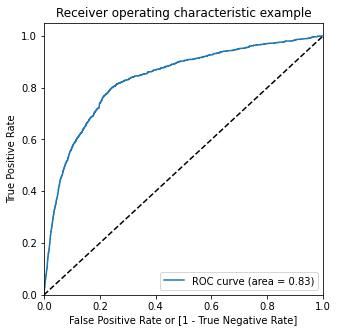

In [183]:
#Drawing the ROC plot
draw_roc(y_train_pred_final.Churn_flag, y_train_pred_final.Churn_Prob)

In [184]:
#AUC value is 0.83. 

## Finding Optimal Cutoff Point

Optimal cutoff probability is that probabilty where we get balanced sensitivity and specificity

In [185]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn_flag  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0           1    0.534535   52684          1    1    1    1    1    1    1   
1           1    0.834482   19383          1    1    1    1    1    1    1   
2           1    0.776370   71788          1    1    1    1    1    1    1   
3           1    0.373801   99717          0    1    1    1    1    0    0   
4           1    0.869027   84752          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    1    1    1    0  
2    1    1    0    0  
3    0    0    0    0  
4    1    1    1    0

In [186]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn_flag, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.574425  0.972169  0.176682
0.2   0.2  0.627925  0.949028  0.306822
0.3   0.3  0.678272  0.916297  0.440246
0.4   0.4  0.727810  0.876218  0.579403
0.5   0.5  0.771799  0.822745  0.720853
0.6   0.6  0.755433  0.664356  0.846511
0.7   0.7  0.707328  0.484599  0.930057
0.8   0.8  0.614635  0.255746  0.973524
0.9   0.9  0.530672  0.067389  0.993954


In [187]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**From the curve above, 0.53 is the optimum point to take it as a cutoff probability**

In [188]:
# creating final prediction for conversion with cutoff probabilty of 0.53
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_pred_final.head()

Churn_flag  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0           1    0.534535   52684          1    1    1    1    1    1    1   
1           1    0.834482   19383          1    1    1    1    1    1    1   
2           1    0.776370   71788          1    1    1    1    1    1    1   
3           1    0.373801   99717          0    1    1    1    1    0    0   
4           1    0.869027   84752          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                1  
1    1    1    1    0                1  
2    1    1    0    0                1  
3    0    0    0    0                0  
4    1    1    1    0                1

In [189]:
#Adding the column Cust score
y_train_pred_final['CustScore']=y_train_pred_final['Churn_Prob']*100


In [190]:
y_train_pred_final.head()

Churn_flag  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0           1    0.534535   52684          1    1    1    1    1    1    1   
1           1    0.834482   19383          1    1    1    1    1    1    1   
2           1    0.776370   71788          1    1    1    1    1    1    1   
3           1    0.373801   99717          0    1    1    1    1    0    0   
4           1    0.869027   84752          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  final_predicted  CustScore  
0    0    0    0    0                1  53.453481  
1    1    1    1    0                1  83.448208  
2    1    1    0    0                1  77.636985  
3    0    0    0    0                0  37.380138  
4    1    1    1    0                1  86.902699

In [191]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn_flag, y_train_pred_final.final_predicted)

0.7782873820816177

In [192]:
# We observe an accuracy of 77.8 It has slightly improved 

In [193]:
#creating confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn_flag, y_train_pred_final.final_predicted )
confusion2

array([[14624,  4563],
       [ 3945, 15242]], dtype=int64)

In [194]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [195]:
# Calculating the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7943920362745609

In [196]:
# Let us calculate specificity
TN / float(TN+FP)

0.7621827278886746

In [197]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.2378172721113254


In [198]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7696036354455945


In [199]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7875491410415209


**We observe that fixing the cutoff probability to 0.53 resulted with accuracy of model = 82.33%
Sensitivity = 82.16%
Specificity = 82.51%**

The accuracy hand senstivity has improved by changing the cutoff probability

## Precision and Recall

**Precision**

TP / TP + FP

In [200]:
##Calculating precision metric
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7696036354455945

**Recall**

TP / TP + FN

In [201]:
#Calculating Recall metric
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.7943920362745609

In [202]:
precision_score(y_train_pred_final.Churn_flag, y_train_pred_final.final_predicted)

0.7696036354455945

In [203]:
recall_score(y_train_pred_final.Churn_flag, y_train_pred_final.final_predicted)

0.7943920362745609

In [204]:
#Precesion value of the model 76.96%  recall = 79.43%
# Alternatively these metrics may be used to analyse the model

## Precision and recall tradeoff

In [205]:
y_train_pred_final.Churn_flag, y_train_pred_final.final_predicted

(0        1
 1        1
 2        1
 3        1
 4        1
 5        1
 6        1
 7        1
 8        1
 9        1
 10       1
 11       1
 12       1
 13       1
 14       1
 15       1
 16       1
 17       1
 18       1
 19       1
 20       1
 21       1
 22       1
 23       1
 24       1
 25       1
 26       1
 27       1
 28       1
 29       1
 30       1
 31       1
 32       1
 33       1
 34       1
 35       1
 36       1
 37       1
 38       1
 39       1
 40       1
 41       1
 42       1
 43       1
 44       1
 45       1
 46       1
 47       1
 48       1
 49       1
 50       1
 51       1
 52       1
 53       1
 54       1
 55       1
 56       1
 57       1
 58       1
 59       1
 60       1
 61       1
 62       1
 63       1
 64       1
 65       1
 66       1
 67       1
 68       1
 69       1
 70       1
 71       1
 72       1
 73       1
 74       1
 75       1
 76       1
 77       1
 78       1
 79       1
 80       1
 81       1
 82       1
 83 

In [206]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn_flag, y_train_pred_final.Churn_Prob)

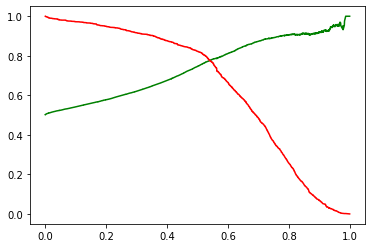

In [207]:
#Plotting thresholds for finding optimum value for precision recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [208]:
#If we use precision recall metrics the threshold probabilty may be  0.56

## Making predictions on the test set

In [209]:
#Reviewing top 5 columns in test set
X_test_logreg = X_test[col]
X_test_logreg.head()


offnet_mou_6  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_mou_6  \
39713     -0.663404          0.057107         -0.238567     -0.298889   
80955     -0.234885         -0.423127         -0.442698      7.309350   
80034      1.068423          6.584691          0.124108      0.274880   
93911     -0.391827          0.358799         -0.332250     -0.486162   
55461     -0.908428          1.355968          0.497420     -0.555373   

       loc_ic_t2m_mou_7  loc_ic_mou_8  std_ic_mou_8  total_ic_mou_6  \
39713         -0.058014     -0.235064     -0.118076       -0.202629   
80955         -0.702117     -0.782537     -0.364626       -0.282513   
80034         -0.728859     -0.664130     -0.162093       -0.814700   
93911          0.016269      0.190982     -0.242987       -0.332304   
55461         -0.138375     -0.143583     -0.181870       -0.484744   

       total_rech_amt_8  max_rech_data_8  sep_vbc_3g  
39713          0.964417        -0.093653    0.665662  
80955         -1.104204        -0.528805   -0.144893  
80034          4.156622        -0.528805   -0.144893  
93911          0.423365        -0.528805   -0.144893  
55461          0.194320        -0.292310   -0.144893

In [210]:
# Adding constant
X_test_sm = sm.add_constant(X_test_logreg)

**Making predictions on the test set**

In [211]:
y_test_pred = res.predict(X_test_sm)

In [212]:
#checking values predicted on test set
y_test_pred[:10]

39713    0.159333
80955    0.985542
80034    0.023411
93911    0.208061
55461    0.196613
82494    0.170210
95725    0.000760
87183    0.096563
96332    0.520385
83861    0.206953
dtype: float64

In [213]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [214]:
# Checking the top 5 rows
y_pred_1.head()

0
39713  0.159333
80955  0.985542
80034  0.023411
93911  0.208061
55461  0.196613

In [215]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [216]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [217]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [218]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [219]:
y_pred_final.head()

churn  CustID         0
0      0   39713  0.159333
1      1   80955  0.985542
2      0   80034  0.023411
3      0   93911  0.208061
4      0   55461  0.196613

In [220]:
# Renaming the column 0 with Churn_Prob
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [221]:
# Adding the column Lead score
y_pred_final['CustScore'] = y_pred_final['Churn_Prob']*100

In [222]:
# Let's see the head of y_pred_final
y_pred_final.head()

churn  CustID  Churn_Prob  CustScore
0      0   39713    0.159333  15.933308
1      1   80955    0.985542  98.554244
2      0   80034    0.023411   2.341081
3      0   93911    0.208061  20.806145
4      0   55461    0.196613  19.661265

In [223]:
#using probabilty cutoff of 0.36 as from ROC predicting for test set
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.53 else 0)

In [224]:
y_pred_final.head()

churn  CustID  Churn_Prob  CustScore  final_predicted
0      0   39713    0.159333  15.933308                0
1      1   80955    0.985542  98.554244                1
2      0   80034    0.023411   2.341081                0
3      0   93911    0.208061  20.806145                0
4      0   55461    0.196613  19.661265                0

In [225]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.7674366948023101

In [226]:
#creating confusion matrix with test set 
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[6302, 1929],
       [ 165,  608]], dtype=int64)

In [227]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [228]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7865459249676585

In [229]:
# Let us calculate specificity
TN / float(TN+FP)

0.7656420848013608

In [230]:
print(classification_report(y_test.churn, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      8231
           1       0.24      0.79      0.37       773

    accuracy                           0.77      9004
   macro avg       0.61      0.78      0.61      9004
weighted avg       0.91      0.77      0.82      9004



**Performance of test set
Accuracy= 76.74%
Sensitivity = 78.65%
Specificity = 76.56%**

## Feature Reduction through PCA

In [232]:
#checking the X_train shape
X_train.shape

(38374, 159)

In [233]:
pca = PCA(random_state=42)

In [234]:
pca.fit(X_train)

PCA(random_state=42)

#### Components from the PCA

In [235]:
pca.components_

array([[ 2.11619385e-02,  4.69988715e-02,  6.81498218e-02, ...,
         1.45087493e-01,  1.46990077e-01,  1.15174476e-01],
       [ 8.42295210e-02,  9.08010056e-02,  7.27571654e-02, ...,
        -3.79610572e-02, -3.55121688e-02, -2.08786317e-02],
       [-1.25141044e-01, -1.64462482e-01, -1.35643931e-01, ...,
        -3.04318288e-02, -3.99202516e-02, -4.12144868e-02],
       ...,
       [ 0.00000000e+00,  1.03718476e-16,  2.53733645e-16, ...,
        -2.67793719e-01, -3.00895643e-01,  2.69385503e-01],
       [ 0.00000000e+00,  5.01808830e-19, -1.00574702e-16, ...,
         1.31862902e-02, -3.29624879e-01,  3.18744166e-01],
       [ 0.00000000e+00, -1.87552925e-16,  2.03746993e-16, ...,
         1.99894559e-01,  8.25091381e-02,  4.43223941e-01]])

Looking at the explained variance ratio for each component

In [236]:
pca.explained_variance_ratio_

array([9.99433660e-02, 9.15420769e-02, 7.81074429e-02, 5.77673478e-02,
       4.85627141e-02, 3.84793040e-02, 3.47428605e-02, 3.07491500e-02,
       2.99970233e-02, 2.21187092e-02, 2.00098481e-02, 1.80745321e-02,
       1.69775857e-02, 1.61086392e-02, 1.60517468e-02, 1.55556439e-02,
       1.34431879e-02, 1.25601933e-02, 1.22249463e-02, 1.20071090e-02,
       1.10276348e-02, 1.05524606e-02, 1.03124999e-02, 1.00199118e-02,
       9.60283625e-03, 8.93700897e-03, 8.62928865e-03, 8.40261913e-03,
       8.02066494e-03, 7.96108672e-03, 7.54338431e-03, 7.36871284e-03,
       7.28961910e-03, 6.99778838e-03, 6.56930190e-03, 6.28757488e-03,
       5.98918532e-03, 5.85421413e-03, 5.64001964e-03, 5.55884087e-03,
       5.36903833e-03, 5.28583690e-03, 5.24080328e-03, 5.09786350e-03,
       4.92077333e-03, 4.77667344e-03, 4.40015246e-03, 4.15496850e-03,
       4.02351150e-03, 3.93620442e-03, 3.66603072e-03, 3.57953763e-03,
       3.48434823e-03, 3.36568871e-03, 3.30105657e-03, 3.17228852e-03,
      

Making a scree plot for the explained variance

In [237]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

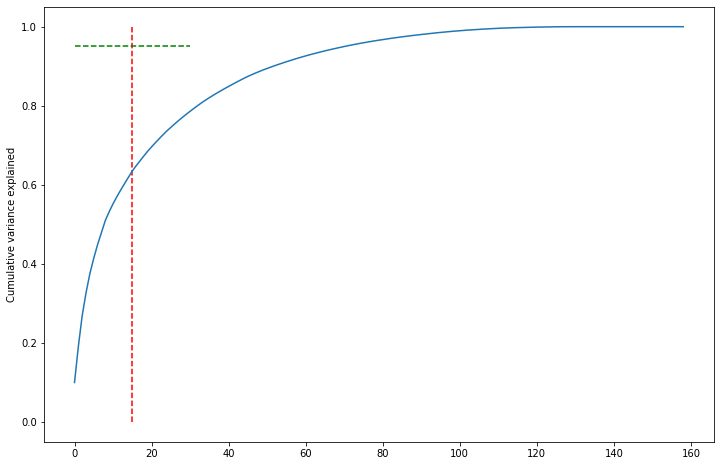

In [238]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

**95% of the data can be explained with 17 PCA components**

Plotting the heatmap of the corr matrix

In [239]:
pca_final = IncrementalPCA(n_components=17)

In [240]:
X_train_pca = pca_final.fit_transform(X_train)

In [241]:
X_train_pca.shape

(38374, 17)

In [242]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [243]:
corrmat.shape

(17, 17)

Plotting the heatmap of the corr matrix

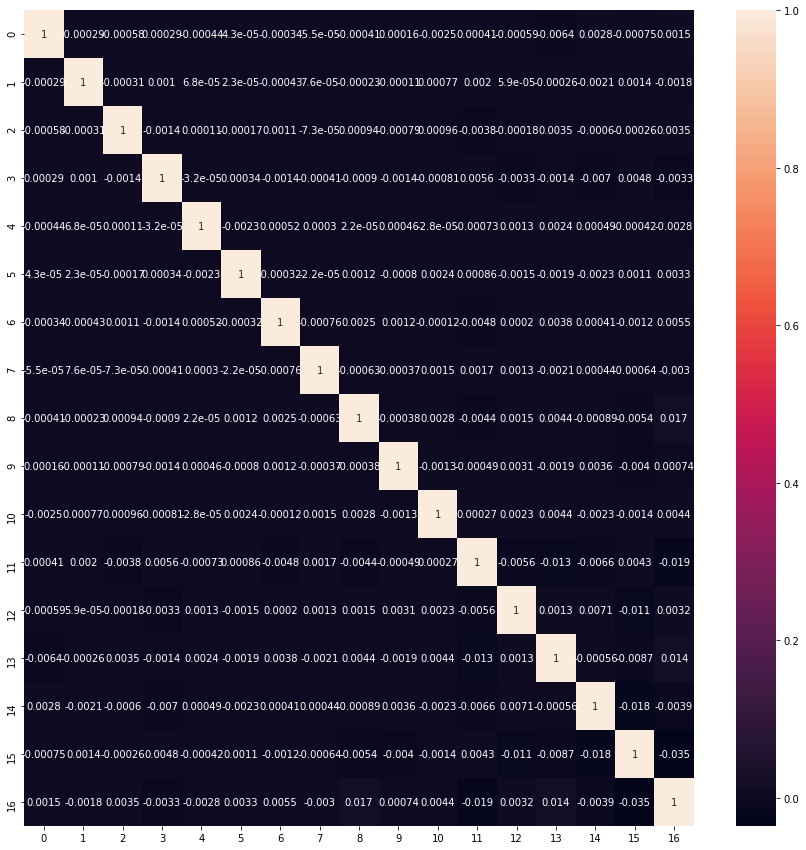

In [244]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)
plt.show()

In [245]:
# Applying the transformation on the test set
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9004, 17)

## Applying logistic regression on the data on our Principal components

In [246]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(X_train_pca, y_train)

In [247]:
y_train_pred_pca = model_pca.predict(X_train_pca)

In [248]:
# Printing confusion matrix
print(confusion_matrix(y_train,y_train_pred_pca))

[[15412  3775]
 [ 3402 15785]]


In [249]:
print("Accuracy of the train set for the logistic regression model with PCA: ",accuracy_score(y_train,y_train_pred_pca))

Accuracy of the train set for the logistic regression model with PCA:  0.8129723250117267


### Making predictions on test set

In [250]:
y_test_pred_pca = model_pca.predict(X_test_pca)

In [251]:
# Printing confusion matrix
print(confusion_matrix(y_test.churn,y_test_pred_pca))
confusion2=confusion_matrix(y_test.churn,y_test_pred_pca)

[[6643 1588]
 [ 136  637]]


In [252]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [253]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8240620957309185

In [254]:
# Let us calculate specificity
TN / float(TN+FP)

0.8070708297898189

In [255]:
#Calculating Recall metric
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8240620957309185

In [256]:
print("Accuracy of the test set for the logistic regression model with PCA: ",accuracy_score(y_test.churn,y_test_pred_pca))

Accuracy of the test set for the logistic regression model with PCA:  0.8085295424255886


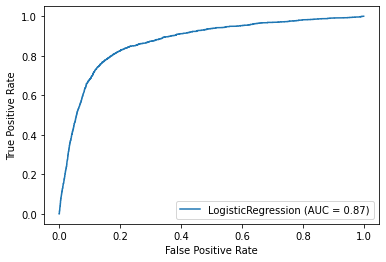

In [257]:
plot_roc_curve(model_pca, X_train_pca, y_train)
plt.show()

In [258]:
#We get AUC value of 0.87

In [259]:
print(classification_report(y_test.churn, y_test_pred_pca))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8231
           1       0.29      0.82      0.42       773

    accuracy                           0.81      9004
   macro avg       0.63      0.82      0.66      9004
weighted avg       0.92      0.81      0.85      9004



In [260]:
pred_prob_lr = model_pca.predict_proba(X_test_pca)
auc_score = roc_auc_score(y_test.churn, pred_prob_lr[:,1])
auc_score

0.8669727906819941

## Using Decision Trees with PCA

In [261]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [262]:
dt_base.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [263]:
y_train_pred = dt_base.predict(X_train_pca)
y_test_pred = dt_base.predict(X_test_pca)

In [264]:
print(classification_report(y_test.churn, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90      8231
           1       0.29      0.68      0.41       773

    accuracy                           0.83      9004
   macro avg       0.63      0.76      0.66      9004
weighted avg       0.91      0.83      0.86      9004



#### Plot the ROC curve

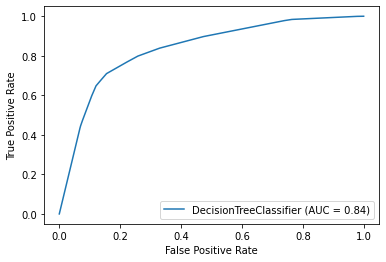

In [265]:
plot_roc_curve(dt_base, X_train_pca, y_train)
plt.show()

AUC value of0.84 for a simple decision tree model with random parameter

### Hyper-parameter tuning for the Decision Tree

In [267]:
dt = DecisionTreeClassifier(random_state=42)

In [268]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500],
    'criterion': ["gini", "entropy"]
}

In [269]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [270]:
%%time
grid_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   53.5s finished


Wall time: 55 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [271]:
grid_search.best_score_

0.9366760343825684

In [272]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=42)

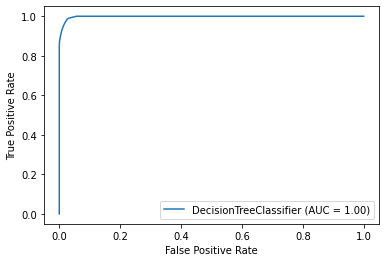

In [273]:
plot_roc_curve(dt_best, X_train_pca, y_train)
plt.show()

In [274]:
#Using decision tree with hyper parameter tuning we are getting AUC value of 1.00

In [275]:
y_train_pred = dt_best.predict(X_train_pca)

r2_score(y_train, y_train_pred)


0.9191118986813989

In [276]:
y_test_pred = dt_best.predict(X_test_pca)

In [277]:
print(classification_report(y_test.churn, dt_best.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      8231
           1       0.31      0.43      0.36       773

    accuracy                           0.87      9004
   macro avg       0.63      0.67      0.64      9004
weighted avg       0.89      0.87      0.88      9004



In [278]:
print("Train Accuracy :", accuracy_score(y_train, dt_best.predict(X_train_pca)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, dt_best.predict(X_train_pca)))
    
confusion2=confusion_matrix(y_train, dt_best.predict(X_train_pca)) 

Train Accuracy : 0.9797779746703497
Train Confusion Matrix:
[[18635   552]
 [  224 18963]]


In [279]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [280]:
# Calculating the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9883254286756659

In [281]:
# Let us calculate specificity
TN / float(TN+FP)

0.9712305206650336

**We observe a
Sensitivity = 98.83%
Specificity = 97.12% on the train set**


## Precision and Recall

**Precision**

TP / TP + FP

In [282]:
##Calculating precision metric
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.9717140661029977

**Recall**

TP / TP + FN

In [283]:
#Calculating Recall metric
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.9883254286756659

In [284]:
print("Test Accuracy :", accuracy_score(y_test.churn, dt_best.predict(X_test_pca)))


Test Accuracy : 0.8687250111061751


In [285]:
print("Test Confusion Matrix:")
print(confusion_matrix(y_test.churn, dt_best.predict(X_test_pca)))
confusion3=confusion_matrix(y_test.churn, dt_best.predict(X_test_pca))

Test Confusion Matrix:
[[7491  740]
 [ 442  331]]


In [286]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [287]:
# Let us calculate specificity
TN / float(TN+FP)

0.910095978617422

In [288]:
pred_prob_dt = dt_best.predict_proba(X_test_pca)
auc_score = roc_auc_score(y_test.churn, pred_prob_dt[:,1])
auc_score

0.6697587906005803

## Random Forest with PCA

In [289]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=42, oob_score=True)

In [290]:
%%time
rf.fit(X_train_pca, y_train)

Wall time: 680 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=42)

In [291]:
rf.oob_score_

0.7781570855266586

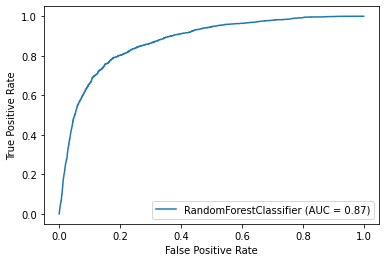

In [292]:
plot_roc_curve(rf, X_train_pca, y_train)
plt.show()

In [293]:
#With random parameters for Random Forest we are able an AUC value of 0.87

### Hyper-parameter tuning for the Random Forest

In [294]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [295]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 30,50, 100, 200]
}

In [296]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [297]:
%%time
grid_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 16.1min finished


Wall time: 16min 14s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [298]:
grid_search.best_score_

0.9657059357762106

In [299]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

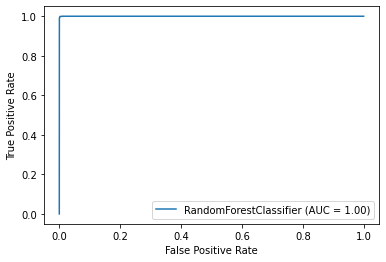

In [300]:
plot_roc_curve(rf_best, X_train_pca, y_train)
plt.show()

In [301]:
rf_best.feature_importances_

array([0.10375738, 0.03786102, 0.07098637, 0.07485454, 0.0352976 ,
       0.03696959, 0.16795797, 0.0316076 , 0.03785802, 0.03734323,
       0.03970547, 0.09903825, 0.02969171, 0.09006112, 0.03147909,
       0.04186179, 0.03366924])

In [302]:
print("Train Accuracy :", accuracy_score(y_train, rf_best.predict(X_train_pca)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, rf_best.predict(X_train_pca)))


Train Accuracy : 0.9909574190858393
Train Confusion Matrix:
[[18840   347]
 [    0 19187]]


In [303]:
print("Test Accuracy :", accuracy_score(y_test.churn, rf_best.predict(X_test_pca)))

Test Accuracy : 0.9104842292314527


In [304]:
print("Test Confusion Matrix:")
print(confusion_matrix(y_test.churn, rf_best.predict(X_test_pca)))
confusion2= confusion_matrix(y_test.churn, rf_best.predict(X_test_pca))

Test Confusion Matrix:
[[7784  447]
 [ 359  414]]


In [305]:
print("Test Accuracy :", accuracy_score(y_test.churn, rf_best.predict(X_test_pca)))


Test Accuracy : 0.9104842292314527


In [306]:
print(classification_report(y_test.churn, rf_best.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8231
           1       0.48      0.54      0.51       773

    accuracy                           0.91      9004
   macro avg       0.72      0.74      0.73      9004
weighted avg       0.92      0.91      0.91      9004



In [307]:
pred_prob_rf = rf_best.predict_proba(X_test_pca)
auc_score1 = roc_auc_score(y_test.churn, pred_prob_rf[:,1])
auc_score1

0.8813019218827383

## Observations


#### Observations from the Interpretable model

As seen from the above model, the variables for the 8th and th  month give significant insights whether the customer is going to churn or not.

variables like std_og_mou_6 ,total_ic_mou_6 , offnet_mou_ are the top 3 variables impacting positively to churn.Implying std outgoing calls , total incoming calls and calls made to other network impact churning. These are key metrics customers look for.

variables like loc_ic_mou_8, total_rech_amt, max_rech_data_8 are the top 3 variables impacting negatively to churn. Features like recharge amount and recharge data attract customers to the nework.

## Recommendations

For many telecom operators, retaining high profitable customers is the primary business goal.

They should come up with plans to offer reasonable outgoing std and local local to other networks. High charges are impacting leading to churn of customers. Plans for small denominations can be offered.
They can offer free minutes of usage for local and std calls. They could also offer night plan offers for cheaper charges post 9PM.Customers prefer plans offering unlimited data or free extra data at minimum charges. 



## Performance Metrics of different models

### Interpretable Logisic Regression Model

Performance of test set Accuracy= 76.74% Sensitivity = 78.65% Specificity = 76.56%    AUC= 0.83

**classification Report**  Precision recall for customers not churning  precision=0.97    recall= 0.77  f1_score=0.86

**High Performance Model with PCA**

### Logistic Regression with PCA

Performance of test set Accuracy= 80.85% Sensitivity = 82.4% Specificity = 80.7%    AUC= 0.87

**Classification Report-** Precision recall for customers not churning  precision=0.98 recall=0.81 f1_score=0.89

roc_auc_score=0.8669

### Decision Trees with PCA

Performance of test set Accuracy= 86.87%    AUC= 1.00

**classification Report-** Precision recall for customers not churning  precision=0.94      recall=0.91      f1_score=0.93

roc_auc_score=0.697

### Random Forest with PCA

Performance of test set Accuracy =91.04%  AUC=1.0

**classification-Report-** Precision recall for customers not churning  precision=0.96      recall=0.95     f1_score= 0.95

roc_auc_score=0.88

## Conclusion

The performance of Random Forest with PCA is the best as compared to other model. It had a high accuracy of 91% with AUC value of 1.00. It has a high precision and recall value

